# Модель машинного обучения <br>"Вольный луг"

## Цель проекта

Необходимо разработать модель машинного обучения, которая поможет молочному хозяйству «Вольный луг» принимать решения о закупке коров. 

Нужно создать две прогнозные модели для отбора коров в поголовье:
1. Первая будет прогнозировать возможный удой коровы (целевой признак Удой);
2. Вторая — рассчитывать вероятность получить вкусное молоко от коровы (целевой признак Вкус молока).

С помощью модели нужно отобрать коров по двум критериям:
- средний удой за год — не менее 6000 килограммов;
- молоко должно быть вкусным.

### Этапы проекта

В качестве данных для проекта используем информацию, предоставленную компанией «ЭкоФерма» - потенциальным поставщиком коров. Имеется 3 таблицы, формата .csv, содержащих следующую информацию:

**Файл `ferma_main.csv` содержит данные о стаде фермера на текущий момент:**
- `id` — уникальный идентификатор коровы.
- `Удой, кг` — масса молока, которую корова даёт в год (в килограммах).
- `ЭКЕ (Энергетическая кормовая единица)` — показатель питательности корма коровы.
- `Сырой протеин, г` — содержание сырого протеина в корме (в граммах).
- `СПО (Сахаро-протеиновое соотношение)` — отношение сахара к протеину в корме коровы.
- `Порода` — порода коровы.
- `Тип пастбища` — ландшафт лугов, на которых паслась корова.
- `порода папы_быка` — порода папы коровы.
- `Жирность,%` — содержание жиров в молоке (в процентах).
- `Белок,%` — содержание белков в молоке (в процентах).
- `Вкус молока` — оценка вкуса по личным критериям фермера, бинарный признак (вкусно, не вкусно).
- `Возраст` — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).

Признаки в датасете `ferma_main.csv` можно разделить на группы:
- `Характеристики коровы:` id, Порода, порода папы_быка, Возраст.
- `Характеристики корма:` ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г, СПО (Сахаро-протеиновое соотношение).
- `Характеристика пастбища:` Тип пастбища.
- `Характеристики молока:` Удой, кг, Жирность,%, Белок,%, Вкус молока.

Такое разделение поможет понять, как взаимосвязаны признаки в датасете.

**Файл `ferma_dad.csv` хранит имя папы каждой коровы в стаде фермера. Описание данных:**
- `id` — уникальный идентификатор коровы.
- `Имя Папы` — имя папы коровы.

**Файл `cow_buy.csv` — это данные о коровах «ЭкоФермы», которых фермер хочет изучить перед покупкой. Описание данных:**
- `Порода` — порода коровы.
- `Тип пастбища` — ландшафт лугов, на которых паслась корова.
- `порода папы_быка` — порода папы коровы.
- `Имя_папы` — имя папы коровы.
- `Текущая_жирность,%` — содержание жиров в молоке (в процентах).
- `Текущий_уровень_белок,%` — содержание белков в молоке (в процентах).
- `Возраст` — возраст коровы, бинарный признак (менее 2 лет, более 2 лет).

Данные в файлах `ferma_main.csv` и `cow_buy.csv` похожи, но у датасета `cow_buy.csv` несколько особенностей:
- Содержание белков и жиров в молоке указано на момент продаж — когда «ЭкоФерма» давала коровам свой корм.
- Параметры корма ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г и СПО (Сахаро-протеиновое соотношение) отсутствуют. Технологи заказчика пересмотрели подход к кормлению: для новых коров планируется увеличить значения каждого из этих параметров на 5%.
- Кроме того, отсутствуют признаки Удой, кг и Вкус молока. Это целевые признаки, именно их предстоит предсказать.

О качестве данных ничего не известно. Перед тем как приступить к разработке модели машинного обучения, понадобится обзор данных и, при необходимости, предобработка.

Таким образом проект пройдет в следующие этапы:

- Обзор данных.
- Предобработка данных.
- Исследовательский анализ данных.
- Корреляционный анализ.
- Обучение модели линейной регрессии.
- Обучение модели логистической регрессии.
- Итоговые выводы.

## Обзор данных

### Получение данных

Загрузим данные из csv-файлов в датафреймы c помощью библиотеки pandas.

In [1]:
# импортируем необходимые модули
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
from matplotlib.pyplot import figure
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler    
from sklearn.preprocessing import OneHotEncoder     
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score 
from sklearn.metrics import precision_score
from sklearn.tree import DecisionTreeClassifier

# константы
RANDOM_STATE = 42

Ячейка для выравнивания всех таблиц markdown:

In [2]:
%%html
<style>
table {float:left}
</style>

In [3]:
# создаем датафреймы из файлов .csv
ferma_main = pd.read_csv('ferma_main.csv', sep=';', decimal=',')
ferma_dad = pd.read_csv('ferma_dad.csv', sep=';')
cow_buy = pd.read_csv('cow_buy.csv', sep=';', decimal=',')

### Общая информация

Выведем первые строки датафреймов и получим общую информацию.

**Рассмотрим датафрейм `ferma_main`.**

In [4]:
# выведем первые 5 строк
ferma_main.head()

id  Удой, кг  ЭКЕ (Энергетическая кормовая единица)  Сырой протеин, г  \
0   1      5863                                   14.2              1743   
1   2      5529                                   12.8              2138   
2   3      5810                                   14.0              1854   
3   4      5895                                   12.4              2012   
4   5      5302                                   12.8              1675   

   СПО (Сахаро-протеиновое соотношение)           Порода Тип пастбища  \
0                                 0.890   Вис Бик Айдиал    Равнинное   
1                                 0.890   Вис Бик Айдиал    Равнинные   
2                                 0.885  РефлешнСоверинг    Холмистое   
3                                 0.885  РефлешнСоверинг    Холмистое   
4                                 0.885   Вис Бик Айдиал    Равнинные   

  порода папы_быка  Жирность,%  Белок,% Вкус молока      Возраст  
0           Айдиал        3.58    3.076      вкусно  более_2_лет  
1          Соверин        3.54    3.079      вкусно  менее_2_лет  
2          Соверин        3.59    3.074   не вкусно  более_2_лет  
3           Айдиал        3.40    3.075   не вкусно  более_2_лет  
4          Соверин        3.73    3.073      вкусно  менее_2_лет

In [5]:
# получим общую информацию
ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     634 non-null    int64  
 1   Удой, кг                               634 non-null    int64  
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    float64
 3   Сырой протеин, г                       634 non-null    int64  
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    float64
 5   Порода                                 634 non-null    object 
 6   Тип пастбища                           634 non-null    object 
 7   порода папы_быка                       634 non-null    object 
 8   Жирность,%                             634 non-null    float64
 9   Белок,%                                634 non-null    float64
 10  Вкус молока                            634 non-null    object 
 11  Возрас

**Вывод:**
- Пропуски не обнаружены.
- Названия столбцов (кроме `id`) написаны кириллицей в разных регистрах.
- Столбцы имеют правильный тип даных.

| Название столбца <br>текущее | Название столбца <br>необходимое |
|:--|:--|
| id | ✔ |
| Удой, кг | milk_yield |
| ЭКЕ (Энергетическая кормовая единица) | energy_feed_unit |
| Сырой протеин, г | raw_protein |
| СПО (Сахаро-протеиновое соотношение) | suga_protein_ratio |
| Порода | breed |
| Тип пастбища | pasture_type |
| порода папы_быка | breed_father |
| Жирность,% | fat |
| Белок,% | protein |
| Вкус молока | taste_milk |
| Возраст | age |

**Рассмотрим датафрейм `ferma_dad`.**

In [6]:
# выведем первые 5 строк
ferma_dad.head()

id  Имя Папы
0   1    Буйный
1   2  Соловчик
2   3     Барин
3   4    Буйный
4   5     Барин

In [7]:
# получим общую информацию
ferma_dad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


**Вывод:**
- Пропуски не обнаружены.
- Столбец `Имя Папы` необходимо переименовать в `name_father`
- Столбцы имеют правильный тип даных.

**Рассмотрим датафрейм `cow_buy`.**

In [8]:
# выведем первые 5 строк
cow_buy.head()

Порода Тип пастбища порода папы_быка  Имя_папы  \
0   Вис Бик Айдиал    холмистое           Айдиал  Геркулес   
1   Вис Бик Айдиал    равнинное          Соверин    Буйный   
2  РефлешнСоверинг    равнинное          Соверин     Барин   
3  РефлешнСоверинг    холмистое           Айдиал    Буйный   
4  РефлешнСоверинг    равнинное           Айдиал    Буйный   

   Текущая_жирность,%  Текущий_уровень_белок,%      Возраст  
0                3.58                    3.076  более_2_лет  
1                3.54                    3.081  менее_2_лет  
2                3.59                    3.074  более_2_лет  
3                3.40                    3.061  более_2_лет  
4                3.64                    3.074  более_2_лет

In [9]:
# получим общую информацию
cow_buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Порода                   20 non-null     object 
 1   Тип пастбища             20 non-null     object 
 2   порода папы_быка         20 non-null     object 
 3   Имя_папы                 20 non-null     object 
 4   Текущая_жирность,%       20 non-null     float64
 5   Текущий_уровень_белок,%  20 non-null     float64
 6   Возраст                  20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB


**Вывод:**
- Пропуски не обнаружены.
- Названия столбцов написаны кириллицей в разных регистрах.
- Столбцы имеют правильный тип даных.

| Название столбца <br>текущее | Название столбца <br>необходимое |
|:--|:--|
| Порода | breed |
| Тип пастбища | pasture_type |
| порода папы_быка | breed_father |
| Имя_папы | name_father |
| Текущая_жирность,% | fat |
| Текущий_уровень_белок,% | protein |
| Возраст | age |

##  Предобработка данных

### Изменение названий столбцов

Переименуем столбцы, где это необходимо (см. п. 2.2) во всех датафреймах. 

In [10]:
# переименуем столбцы в датафрейме 'ferma_main'
ferma_main = ferma_main.rename(
    columns={
        'Удой, кг':         'milk_yield',
        'ЭКЕ (Энергетическая кормовая единица)': 'energy_feed_unit',              
        'Сырой протеин, г': 'raw_protein',
        'СПО (Сахаро-протеиновое соотношение)':  'suga_protein_ratio',
        'Порода':           'breed',
        'Тип пастбища':     'pasture_type',
        'порода папы_быка': 'breed_father',
        'Жирность,%':       'fat',
        'Белок,%':          'protein',
        'Вкус молока':      'taste_milk',
        'Возраст':          'age',  
    }
)

In [11]:
# переименуем столбец в датафрейме 'ferma_dad'
ferma_dad = ferma_dad.rename(
    columns={
        'Имя Папы': 'name_father',
    }
)

In [12]:
# переименуем столбцы в датафрейме 'cow_buy'
cow_buy = cow_buy.rename(
    columns={
        'Порода':                  'breed',
        'Тип пастбища':            'pasture_type',
        'порода папы_быка':        'breed_father',
        'Имя_папы':                'name_father',
        'Текущая_жирность,%':      'fat',
        'Текущий_уровень_белок,%': 'protein',
        'Возраст':                 'age',  
    }
)

Выведем информацию о датафреймах и проверим, переименовались ли столбцы.

In [13]:
# информация о датафрейме 'ferma_main'
ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  634 non-null    int64  
 1   milk_yield          634 non-null    int64  
 2   energy_feed_unit    634 non-null    float64
 3   raw_protein         634 non-null    int64  
 4   suga_protein_ratio  634 non-null    float64
 5   breed               634 non-null    object 
 6   pasture_type        634 non-null    object 
 7   breed_father        634 non-null    object 
 8   fat                 634 non-null    float64
 9   protein             634 non-null    float64
 10  taste_milk          634 non-null    object 
 11  age                 634 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 59.6+ KB


Столбцы переименованы.

In [14]:
# информация о датафрейме 'ferma_dad'
ferma_dad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           629 non-null    int64 
 1   name_father  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


Столбец переименован.

In [15]:
# информация о датафрейме 'ferma_dad'
cow_buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   breed         20 non-null     object 
 1   pasture_type  20 non-null     object 
 2   breed_father  20 non-null     object 
 3   name_father   20 non-null     object 
 4   fat           20 non-null     float64
 5   protein       20 non-null     float64
 6   age           20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB


Столбцы переименованы.

**Вывод:**
- В датафреймах `ferma_main`, `ferma_dad`, `cow_buy` столбцы успешно переименованы.

### Обработка дубликатов

**Проверим датафреймы на явные дубликаты**

In [16]:
# выведем количество явных дубликатов датафрейма ferma_main
ferma_main.duplicated().sum()

5

In [17]:
# выведем общее количество строк датафрейма ferma_main
ferma_main.shape[0]

634

In [18]:
# удалим явные дубликаты в датафрейме ferma_main
ferma_main = ferma_main.drop_duplicates().reset_index(drop=True)

# Число явных дубликатов после удаленя
ferma_main.duplicated().sum()

0

In [19]:
# выведем общее количество строк датафрейма ferma_main
ferma_main.shape[0]

629

Явные дубликаты успешно удалены.

In [20]:
# выведем количество явных дубликатов датафрейма ferma_dad
ferma_dad.duplicated().sum()

0

Явных дубликатов не обнаружено.

In [21]:
# выведем количество явных дубликатов датафрейма cow_buy
cow_buy.duplicated().sum()

4

In [22]:
# выведем общее количество строк датафрейма cow_buy
cow_buy.shape[0]

20

Дубликатов в датафрейме `cow_buy` значительное количество. Выведем его полностью и изучим более подробно.

In [23]:
# выведем датафрейм полностью
cow_buy

breed pasture_type breed_father name_father   fat  protein  \
0    Вис Бик Айдиал    холмистое       Айдиал    Геркулес  3.58    3.076   
1    Вис Бик Айдиал    равнинное      Соверин      Буйный  3.54    3.081   
2   РефлешнСоверинг    равнинное      Соверин       Барин  3.59    3.074   
3   РефлешнСоверинг    холмистое       Айдиал      Буйный  3.40    3.061   
4   РефлешнСоверинг    равнинное       Айдиал      Буйный  3.64    3.074   
5   РефлешнСоверинг    равнинное      Соверин    Геркулес  3.63    3.053   
6    Вис Бик Айдиал    холмистое       Айдиал    Геркулес  3.58    3.076   
7    Вис Бик Айдиал    равнинное      Соверин      Буйный  3.57    3.079   
8   РефлешнСоверинг    равнинное      Соверин       Барин  3.59    3.074   
9   РефлешнСоверинг    холмистое       Айдиал      Буйный  3.40    3.079   
10   Вис Бик Айдиал    холмистое      Соверин    Соловчик  3.73    3.055   
11  РефлешнСоверинг    равнинное      Соверин    Геркулес  3.73    3.073   
12   Вис Бик Айдиал    холмистое       Айдиал    Геркулес  3.68    3.046   
13   Вис Бик Айдиал    холмистое      Соверин       Барин  3.42    3.075   
14  РефлешнСоверинг    равнинное      Соверин       Барин  3.59    3.074   
15  РефлешнСоверинг    холмистое       Айдиал      Буйный  3.40    3.065   
16   Вис Бик Айдиал    холмистое      Соверин    Соловчик  3.73    3.079   
17  РефлешнСоверинг    равнинное      Соверин    Геркулес  3.77    3.053   
18   Вис Бик Айдиал    равнинное      Соверин      Буйный  3.34    3.069   
19  РефлешнСоверинг    равнинное       Айдиал      Буйный  3.64    3.074   

            age  
0   более_2_лет  
1   менее_2_лет  
2   более_2_лет  
3   более_2_лет  
4   более_2_лет  
5   менее_2_лет  
6   более_2_лет  
7   более_2_лет  
8   более_2_лет  
9   менее_2_лет  
10  более_2_лет  
11  более_2_лет  
12  более_2_лет  
13  менее_2_лет  
14  более_2_лет  
15  более_2_лет  
16  более_2_лет  
17  менее_2_лет  
18  более_2_лет  
19  более_2_лет

Поскольку нам необходимо предсказать удой и вкус молока для коров «ЭкоФермы», то даже если в данных действительно присутствует полное совпадение (не дубликаты), для наших целей одинаковые строки не имеют смысла, поскольку для любого числа одинаковых строк будет одинаковое предсказание. Удалим дубликаты из датаврейма `cow_buy`. В дальнейшем необходимо получить дополнительную информацию такую как id коровы, чтобы понимать где дубликаты, а где - нет.

In [24]:
# удалим явные дубликаты
cow_buy = cow_buy.drop_duplicates().reset_index(drop=True)

# проверим, остались ли дубликаты после удаления
cow_buy.duplicated().sum()

0

In [25]:
# выведем датафрейм полностью
cow_buy

breed pasture_type breed_father name_father   fat  protein  \
0    Вис Бик Айдиал    холмистое       Айдиал    Геркулес  3.58    3.076   
1    Вис Бик Айдиал    равнинное      Соверин      Буйный  3.54    3.081   
2   РефлешнСоверинг    равнинное      Соверин       Барин  3.59    3.074   
3   РефлешнСоверинг    холмистое       Айдиал      Буйный  3.40    3.061   
4   РефлешнСоверинг    равнинное       Айдиал      Буйный  3.64    3.074   
5   РефлешнСоверинг    равнинное      Соверин    Геркулес  3.63    3.053   
6    Вис Бик Айдиал    равнинное      Соверин      Буйный  3.57    3.079   
7   РефлешнСоверинг    холмистое       Айдиал      Буйный  3.40    3.079   
8    Вис Бик Айдиал    холмистое      Соверин    Соловчик  3.73    3.055   
9   РефлешнСоверинг    равнинное      Соверин    Геркулес  3.73    3.073   
10   Вис Бик Айдиал    холмистое       Айдиал    Геркулес  3.68    3.046   
11   Вис Бик Айдиал    холмистое      Соверин       Барин  3.42    3.075   
12  РефлешнСоверинг    холмистое       Айдиал      Буйный  3.40    3.065   
13   Вис Бик Айдиал    холмистое      Соверин    Соловчик  3.73    3.079   
14  РефлешнСоверинг    равнинное      Соверин    Геркулес  3.77    3.053   
15   Вис Бик Айдиал    равнинное      Соверин      Буйный  3.34    3.069   

            age  
0   более_2_лет  
1   менее_2_лет  
2   более_2_лет  
3   более_2_лет  
4   более_2_лет  
5   менее_2_лет  
6   более_2_лет  
7   менее_2_лет  
8   более_2_лет  
9   более_2_лет  
10  более_2_лет  
11  менее_2_лет  
12  более_2_лет  
13  более_2_лет  
14  менее_2_лет  
15  более_2_лет

Явные дубликаты удалены.

**Проверим датафреймы на неявные дубликаты**

In [26]:
# создадим список столбцов, подлежащих проверке для датафрейма ferma_main
main_list = ['breed', 'pasture_type', 'breed_father', 'taste_milk', 'age']
buy_list = ['breed', 'pasture_type', 'breed_father', 'name_father', 'age']

In [27]:
# выведем количество и сами уникальные значения столбцов ferma_main
for i in main_list:
    print(f'{i:14}: {ferma_main[i].nunique()} {ferma_main[i].unique()}')

breed         : 2 ['Вис Бик Айдиал' 'РефлешнСоверинг']
pasture_type  : 3 ['Равнинное' 'Равнинные' 'Холмистое']
breed_father  : 3 ['Айдиал' 'Соверин' 'Айдиалл']
taste_milk    : 2 ['вкусно' 'не вкусно']
age           : 2 ['более_2_лет' 'менее_2_лет']


В столбцах `'pasture_type'` и `'breed_father'` датафрейма `ferma_main` обнаружены ошибки в заполнении данных. Неявных дубликатов не обнаружено.

- Заменим значение 'Равнинные' на 'Равнинное' в `'pasture_type'`.
- Заменим значение 'Айдиалл' на 'Айдиал' в `'breed_father'`.

In [28]:
print('Размеры таблицы до изменения:', ferma_main.shape)

# заменим значения
ferma_main['pasture_type'] = (
    ferma_main['pasture_type']
    .replace('Равнинные', 'Равнинное', regex=True)
)

ferma_main['breed_father'] = (
    ferma_main['breed_father']
    .replace('Айдиалл', 'Айдиал', regex=True)
)

print('Размеры таблицы после изменения:', ferma_main.shape)

Размеры таблицы до изменения: (629, 12)
Размеры таблицы после изменения: (629, 12)


In [29]:
# выведем уникальные значения столбцов и их количество для ferma_main
for i in main_list:
    print(f'{i:14}: {ferma_main[i].nunique()} {ferma_main[i].unique()}')

breed         : 2 ['Вис Бик Айдиал' 'РефлешнСоверинг']
pasture_type  : 2 ['Равнинное' 'Холмистое']
breed_father  : 2 ['Айдиал' 'Соверин']
taste_milk    : 2 ['вкусно' 'не вкусно']
age           : 2 ['более_2_лет' 'менее_2_лет']


Неявные дубликаты в датафрейме `ferma_main` удалены.

In [30]:
# выведем уникальные значения столбцов и их количество для ferma_dad
for i in ['name_father']:
    print(f'{i:10}: {ferma_dad[i].nunique()} {ferma_dad[i].unique()}')

name_father: 4 ['Буйный' 'Соловчик' 'Барин' 'Геркулес']


Неявных дубликатов в датафрейме `ferma_dad` не обнаружено.

In [31]:
# выведем уникальные значения столбцов и их количество для cow_buy
for i in buy_list:
    print(f'{i:14}: {cow_buy[i].nunique()} {cow_buy[i].unique()}')

breed         : 2 ['Вис Бик Айдиал' 'РефлешнСоверинг']
pasture_type  : 2 ['холмистое' 'равнинное']
breed_father  : 2 ['Айдиал' 'Соверин']
name_father   : 4 ['Геркулес' 'Буйный' 'Барин' 'Соловчик']
age           : 2 ['более_2_лет' 'менее_2_лет']


Неявных дубликатов в датафрейме `cow_buy` не обнаружено.

**Приведем значения столбцов в датафреймах `ferma_main` и `cow_buy` к единому виду, для удобства чтения и последующего анализа.**

In [32]:
# заменяем значения в столбцах cow_buy
print('Размеры таблицы до изменения:', cow_buy.shape)

# заменим значения
cow_buy['pasture_type'] = (
    cow_buy['pasture_type']
    .replace('равнинное', 'Равнинное', regex=True)
    .replace('холмистое', 'Холмистое', regex=True)
)
cow_buy['age'] = (
    cow_buy['age']
    .replace('более_2_лет', 'Более 2 лет', regex=True)
    .replace('менее_2_лет', 'Менее 2 лет', regex=True)
)
cow_buy['breed'] = (
    cow_buy['breed']
    .replace('РефлешнСоверинг', 'Рефлешн Соверинг', regex=True)
)
print('Размеры таблицы после изменения:', cow_buy.shape)

Размеры таблицы до изменения: (16, 7)
Размеры таблицы после изменения: (16, 7)


In [33]:
# заменяем значения в столбцах ferma_main
print('Размеры таблицы после изменения:', ferma_main.shape)

ferma_main['age'] = (
    ferma_main['age']
    .replace('более_2_лет', 'Более 2 лет', regex=True)
    .replace('менее_2_лет', 'Менее 2 лет', regex=True)
)
ferma_main['breed'] = (
    ferma_main['breed']
    .replace('РефлешнСоверинг', 'Рефлешн Соверинг', regex=True)
)
ferma_main['taste_milk'] = (
    ferma_main['taste_milk']
    .replace('вкусно', 'Вкусно', regex=True)
    .replace('не Вкусно', 'Не вкусно', regex=True)
)
print('Размеры таблицы после изменения:', ferma_main.shape)

Размеры таблицы после изменения: (629, 12)
Размеры таблицы после изменения: (629, 12)


In [34]:
# выведем уникальные значения столбцов и их количество для ferma_main
for i in main_list:
    print(f'{i:14}: {ferma_main[i].nunique()} {ferma_main[i].unique()}')

breed         : 2 ['Вис Бик Айдиал' 'Рефлешн Соверинг']
pasture_type  : 2 ['Равнинное' 'Холмистое']
breed_father  : 2 ['Айдиал' 'Соверин']
taste_milk    : 2 ['Вкусно' 'Не вкусно']
age           : 2 ['Более 2 лет' 'Менее 2 лет']


In [35]:
# выведем уникальные значения cow_buy
for i in buy_list:
    print(f'{i:14}: {cow_buy[i].nunique()} {cow_buy[i].unique()}')

breed         : 2 ['Вис Бик Айдиал' 'Рефлешн Соверинг']
pasture_type  : 2 ['Холмистое' 'Равнинное']
breed_father  : 2 ['Айдиал' 'Соверин']
name_father   : 4 ['Геркулес' 'Буйный' 'Барин' 'Соловчик']
age           : 2 ['Более 2 лет' 'Менее 2 лет']


In [36]:
# проверим пропуски во всех датафреймах, выведем их количество
ferma_main.isna().sum().sum() + ferma_dad.isna().sum().sum() + cow_buy.isna().sum().sum()

0

In [37]:
# проверим точность совпадения, выведем уникальные значения совпадающих столбцов ferma_main и cow_buy
# запишем в переменную совпадающие столбцы
intersect = list(set(main_list).intersection(buy_list))

# проверим совпадают ли уникальные значения в столбцах
for i in intersect:
    print(set(ferma_main[i].unique()))
    print(set(cow_buy[i].unique()))      
    print(set(ferma_main[i].unique()).issubset(set(cow_buy[i].unique())))
    print()

{'Более 2 лет', 'Менее 2 лет'}
{'Более 2 лет', 'Менее 2 лет'}
True

{'Айдиал', 'Соверин'}
{'Айдиал', 'Соверин'}
True

{'Вис Бик Айдиал', 'Рефлешн Соверинг'}
{'Вис Бик Айдиал', 'Рефлешн Соверинг'}
True

{'Холмистое', 'Равнинное'}
{'Равнинное', 'Холмистое'}
True



Уникальные значения в датафреймах `ferma_main` и `cow_buy` совпадают.

**Вывод:**

Предобработка данных завершена:

- пропусков не обнаружено;
- названия столбцов изменены;
- явные дубликаты удалены;
- неявных дубликатов не обнаружено;
- исправлены ошибки в заполнении данных;
- одинаковые по смыслу значения столбцов приведены к общему виду. 

Данные корректны и готовы к анализу.

## Объединение данных

Для дальнейшего анализа в датафрейме `ferma_main` не хватает информации об имени отцов коров. Эти данные содержатся в датафрейме `ferma_dad`. Расширим таблицу `ferma_main`, присоединив значения столбца `'name_father'` по id для каждой коровы.

In [38]:
# размеры датафрейма ferma_main
ferma_main.shape

(629, 12)

In [39]:
# размеры датафрейма ferma_main
ferma_dad.shape

(629, 2)

Возьмём за основу ferma_main. В этом датафрейме стало меньше строк на этапе предобработки. Итоговый датафрейм ferma_main должен иметь размеры (629, 13).

In [40]:
# объединяем данные
ferma_main = ferma_main.merge(
    ferma_dad,
    on='id',    # используем id для объединения
    how='left', # берем за основу ferma_main
)

In [41]:
# выведем размеры ferma_main после объединения
ferma_main.shape

(629, 13)

In [42]:
# выведем первые строки ferma_main
ferma_main.head()

id  milk_yield  energy_feed_unit  raw_protein  suga_protein_ratio  \
0   1        5863              14.2         1743               0.890   
1   2        5529              12.8         2138               0.890   
2   3        5810              14.0         1854               0.885   
3   4        5895              12.4         2012               0.885   
4   5        5302              12.8         1675               0.885   

              breed pasture_type breed_father   fat  protein taste_milk  \
0    Вис Бик Айдиал    Равнинное       Айдиал  3.58    3.076     Вкусно   
1    Вис Бик Айдиал    Равнинное      Соверин  3.54    3.079     Вкусно   
2  Рефлешн Соверинг    Холмистое      Соверин  3.59    3.074  Не вкусно   
3  Рефлешн Соверинг    Холмистое       Айдиал  3.40    3.075  Не вкусно   
4    Вис Бик Айдиал    Равнинное      Соверин  3.73    3.073     Вкусно   

           age name_father  
0  Более 2 лет      Буйный  
1  Менее 2 лет    Соловчик  
2  Более 2 лет       Барин  
3  Более 2 лет      Буйный  
4  Менее 2 лет       Барин

In [43]:
# получим общую информацию о датафрейме ferma_main
ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 629 entries, 0 to 628
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  629 non-null    int64  
 1   milk_yield          629 non-null    int64  
 2   energy_feed_unit    629 non-null    float64
 3   raw_protein         629 non-null    int64  
 4   suga_protein_ratio  629 non-null    float64
 5   breed               629 non-null    object 
 6   pasture_type        629 non-null    object 
 7   breed_father        629 non-null    object 
 8   fat                 629 non-null    float64
 9   protein             629 non-null    float64
 10  taste_milk          629 non-null    object 
 11  age                 629 non-null    object 
 12  name_father         629 non-null    object 
dtypes: float64(4), int64(3), object(6)
memory usage: 68.8+ KB


**Вывод:**

Объединение прошло успешно, столбец `'name_father'` добавлен в датафрейм `ferma_main`.

## Исследовательский анализ данных

- Проведем статистический анализ всех признаков.
- Построим графики для каждого признака.
- Сделаем выводы о данных.

### Удой

In [44]:
# получим описательные статистики удоя за год
ferma_main['milk_yield'].describe()

count      629.000000
mean      6188.750397
std       1644.795489
min       5204.000000
25%       5751.000000
50%       6133.000000
75%       6501.000000
max      45616.000000
Name: milk_yield, dtype: float64

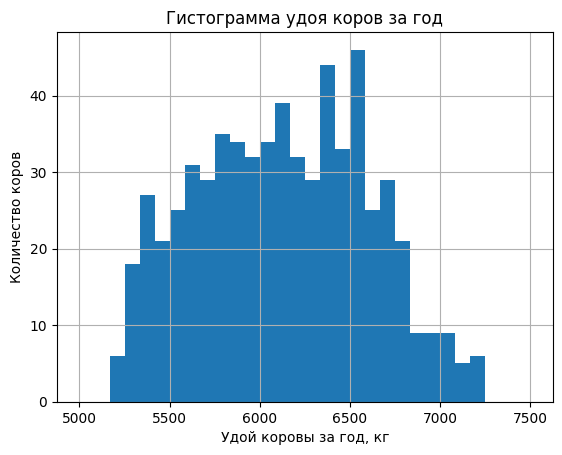

In [45]:
# построим гистограмму удоя
ferma_main['milk_yield'].plot(
    kind='hist',
    grid=True,
    range=(5000, 7500),
    bins=30,
    title = 'Гистограмма удоя коров за год',
)
plt.xlabel('Удой коровы за год, кг')
plt.ylabel('Количество коров')

plt.show()

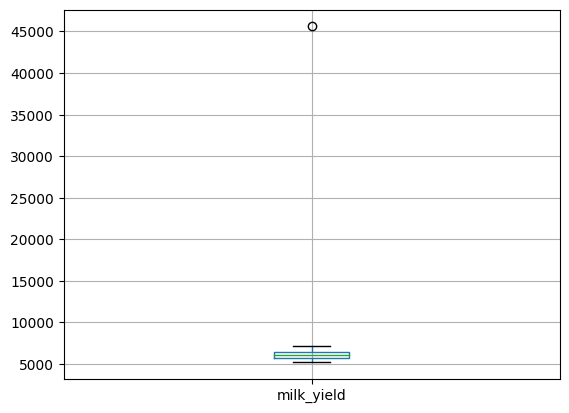

In [46]:
# построим диаграмму размаха
ferma_main.boxplot(column='milk_yield')
plt.show()

In [47]:
ferma_main.query('milk_yield > 10000')

id  milk_yield  energy_feed_unit  raw_protein  suga_protein_ratio  \
16  17       45616              11.5         1675                0.93   

             breed pasture_type breed_father   fat  protein taste_milk  \
16  Вис Бик Айдиал    Холмистое       Айдиал  3.22    3.076     Вкусно   

            age name_father  
16  Более 2 лет      Буйный

Обнаружена одна аномальная строка, удалим её.

In [48]:
ferma_main = ferma_main.query('milk_yield <= 7500')

Выведем статистики для исправленных данных.

In [49]:
ferma_main['milk_yield'].describe()

count     628.000000
mean     6125.968153
std       475.857053
min      5204.000000
25%      5749.750000
50%      6132.500000
75%      6501.000000
max      7222.000000
Name: milk_yield, dtype: float64

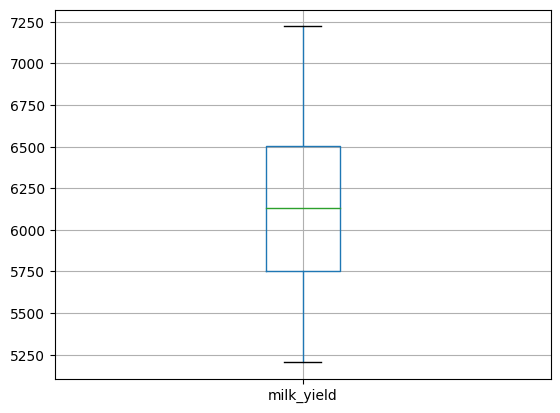

In [50]:
# построим диаграмму размаха
ferma_main.boxplot(column='milk_yield')
plt.show()

Выбросов не обнаружено. Данные выглядят корректно. Средний удой ≈ 6126 кг/год. Характерный диапазон значений удоя (примерно половина коров): 5749 - 6501 кг/год.

### ЭКЕ (Энергетическая кормовая единица)

In [51]:
# получим описательные статистики ЭКЕ
ferma_main['energy_feed_unit'].describe()

count    628.000000
mean      14.548726
std        1.301777
min       10.900000
25%       13.500000
50%       14.700000
75%       15.600000
max       16.800000
Name: energy_feed_unit, dtype: float64

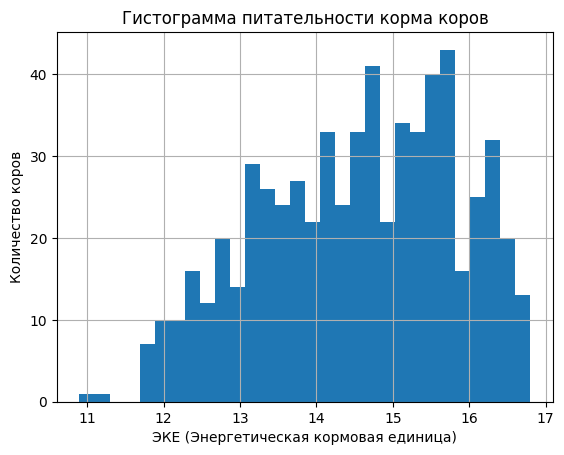

In [52]:
# построим гистограмму ЭКЕ
ferma_main['energy_feed_unit'].plot(
    kind='hist',
    grid=True,
    bins=30,
    title = 'Гистограмма питательности корма коров',
)
plt.xlabel('ЭКЕ (Энергетическая кормовая единица)')
plt.ylabel('Количество коров')

plt.show()

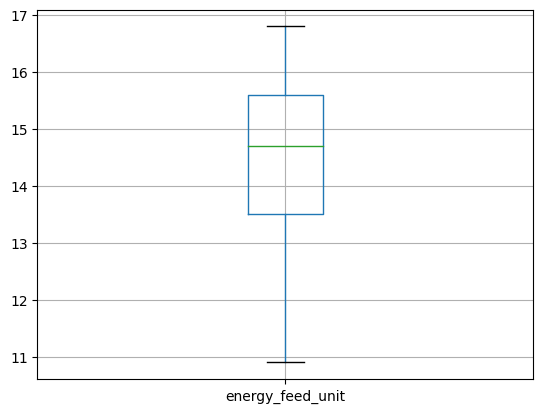

In [53]:
# построим диаграмму размаха
ferma_main.boxplot(column='energy_feed_unit')
plt.show()

Выбросов не обнаружено. Данные выглядят корректно. Средняя ЭКЕ ≈ 14,55.

### Сырой протеин

In [54]:
# получим описательные статистики содержания сырого протеина в корме
ferma_main['raw_protein'].describe()

count     628.000000
mean     1923.759554
std       182.832816
min      1660.000000
25%      1771.750000
50%      1888.000000
75%      2062.250000
max      2349.000000
Name: raw_protein, dtype: float64

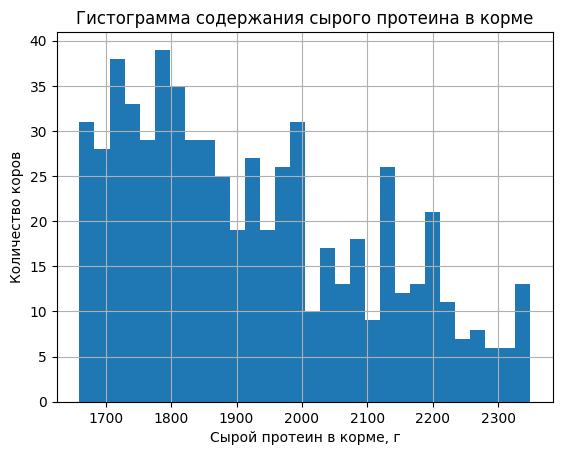

In [55]:
# построим гистограмму сырого протеина в корме
ferma_main['raw_protein'].plot(
    kind='hist',
    grid=True,
    bins=30,
    title = 'Гистограмма содержания сырого протеина в корме',
)
plt.xlabel('Сырой протеин в корме, г')
plt.ylabel('Количество коров')

plt.show()

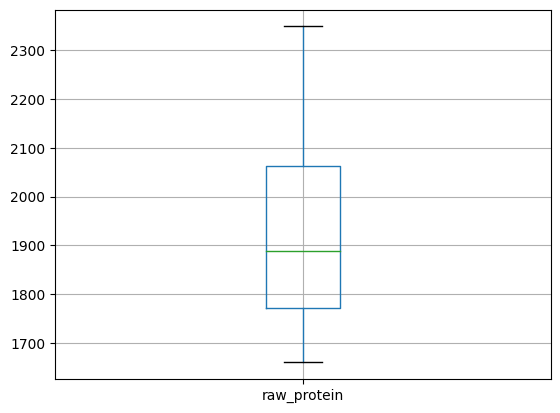

In [56]:
# построим диаграмму размаха
ferma_main.boxplot(column='raw_protein')
plt.show()

Выбросов не обнаружено. Данные выглядят корректно. Среднее содержание сырого протеина в корме ≈ 1924 г.

### СПО (Сахаро-протеиновое соотношение)

In [57]:
# получим описательные статистики СПО в корме
ferma_main['suga_protein_ratio'].describe()

count    628.000000
mean       0.913089
std        0.032221
min        0.840000
25%        0.890000
50%        0.930000
75%        0.940000
max        0.960000
Name: suga_protein_ratio, dtype: float64

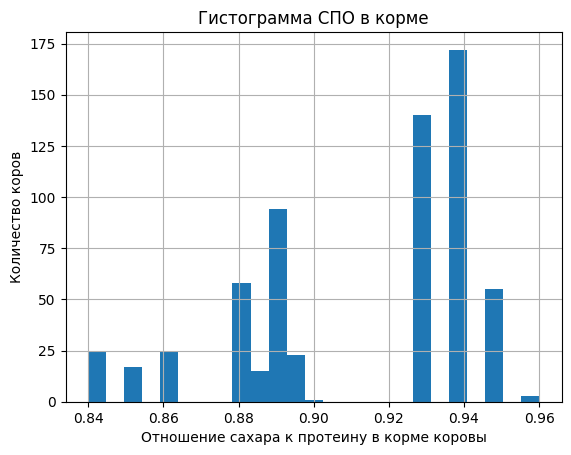

In [58]:
# построим гистограмму СПО в корме
ferma_main['suga_protein_ratio'].plot(
    kind='hist',
    grid=True,
    bins=25,
    title = 'Гистограмма СПО в корме',
)
plt.xlabel('Отношение сахара к протеину в корме коровы')
plt.ylabel('Количество коров')

plt.show()

Гистограмма показывает неравномерность и отсутствие значений: 0.87, 0.91, 0.92. Проверим это и выведем все уникальные значения.

In [59]:
ferma_main['suga_protein_ratio'].value_counts().sort_index(ascending=False)

0.960      3
0.950     55
0.940    172
0.930    140
0.900      1
0.895     23
0.890     94
0.885     15
0.880     58
0.860     25
0.850     17
0.840     25
Name: suga_protein_ratio, dtype: int64

Действительно, часть значений отсутствует и это выглядит неестественно.

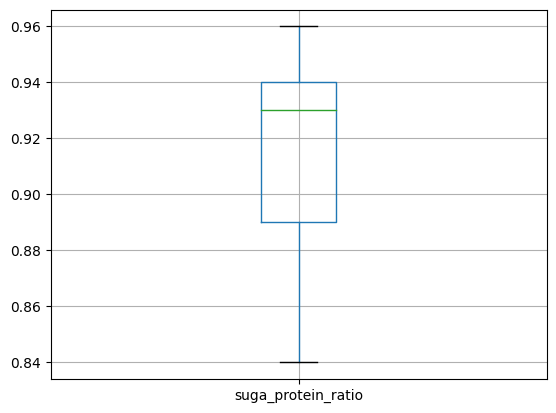

In [60]:
# построим диаграмму размаха
ferma_main.boxplot(column='suga_protein_ratio')
plt.show()

Выбросов не обнаружено. Присутствуют провалы в данных, значений 0.87, 0.91, 0.92 не обнаружено. Необходимо запросить у фермера пояснения к данному столбцу и пропущенные данные, если они имеются. 

Среднее отношение сахара в корме коровы ≈ 0,91 .

### Порода

**Стадо фермера**

In [61]:
# Создадим функцию для построения круговых диаграмм
# в качестве аргументов передаём: 
# series: ferma_main['breed']
# name: 'Соотношение породы коров \n в стаде фермера'
def pie(series, name): 
    series.value_counts().plot(
        kind='pie', 
        autopct='%.2f%%'
    ) 
    plt.title(name)
    plt.ylabel('')
    fig = plt.gcf()
    fig.set_size_inches(5,5) 
    
    plt.show()

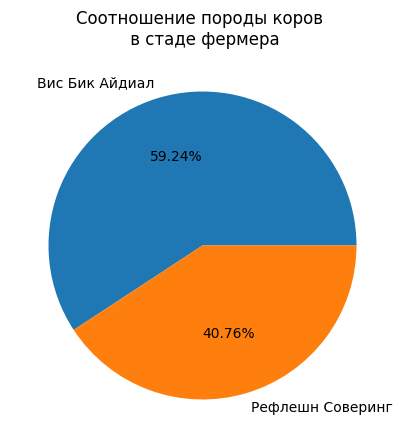

In [62]:
# Построим круговую диаграмму породы для датафрейма ferma_main
pie(ferma_main['breed'], 'Соотношение породы коров \n в стаде фермера')

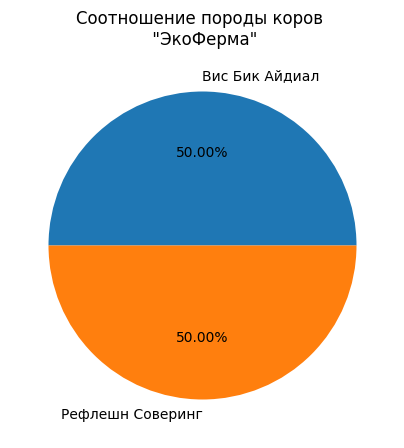

In [63]:
# Построим круговую диаграмму породы для датафрейма cow_buy
pie(cow_buy['breed'],'Соотношение породы коров \n "ЭкоФерма"') 

В стаде фермера преобладает порода Вис Бик Айдиал ≈ 59%. В данных от "ЭкоФермы" равное число коров Вис Бик Айдиал и РефлешнСоверинг.

### Тип пастбища

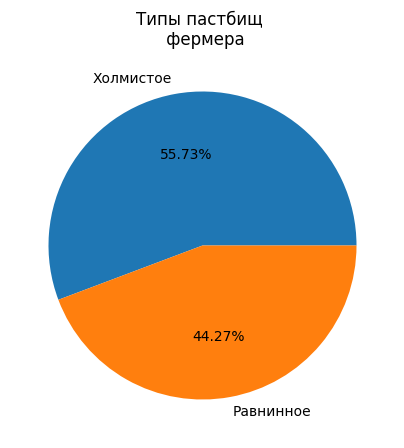

In [64]:
# Построим круговую диаграмму типов пастбища для датафрейма ferma_main
pie(ferma_main['pasture_type'], 'Типы пастбищ \n фермера')

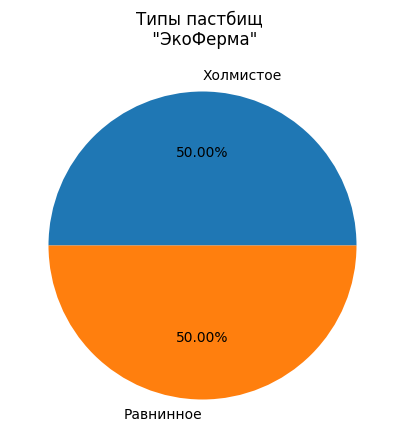

In [65]:
# Построим круговую диаграмму типов пастбища для датафрейма cow_buy
pie(cow_buy['pasture_type'], 'Типы пастбищ \n "ЭкоФерма"')

Коровы фермера пасутся преимущественно на холмистых пастбищах. В данных от "ЭкоФермы" распределение коров по пастбищам одинаковое.

### Порода быка - отца коровы

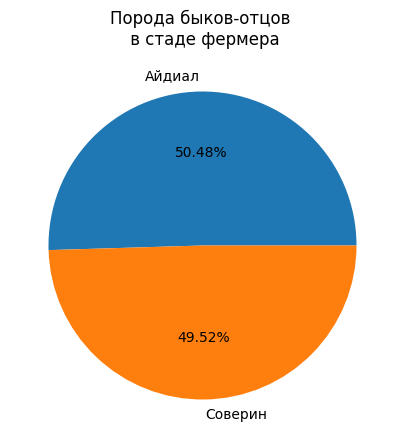

In [66]:
# построим круговую диаграмму пород быков - отцов исследуемых коров для ferma_main
pie(ferma_main['breed_father'], 'Порода быков-отцов \n в стаде фермера')

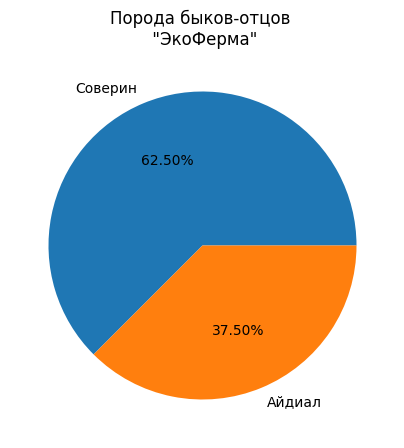

In [67]:
# построим круговую диаграмму пород быков - отцов исследуемых коров для cow_buy
pie(cow_buy['breed_father'], 'Порода быков-отцов \n "ЭкоФерма"')

Быки - отцы исследуемых коров имеют преимущественно породу Соверин в данных от "ЭкоФермы" в то время, как в стаде фермера соотношение Соверин и Айдиал примерно одинаковое.

### Жирность молока

In [68]:
# получим описательные статистики жирности молока (%) для ferma_main
ferma_main['fat'].describe()

count    628.000000
mean       3.604268
std        0.168093
min        2.990000
25%        3.590000
50%        3.650000
75%        3.720000
max        3.750000
Name: fat, dtype: float64

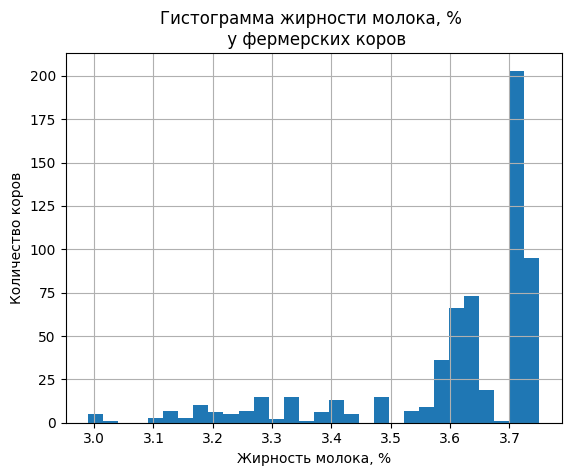

In [69]:
# построим гистограмму жирности молока для ferma_main
ferma_main['fat'].plot(
    kind='hist',
    grid=True,
    bins=30,
    title = 'Гистограмма жирности молока, % \n у фермерских коров',
)
plt.xlabel('Жирность молока, %')
plt.ylabel('Количество коров')

plt.show()

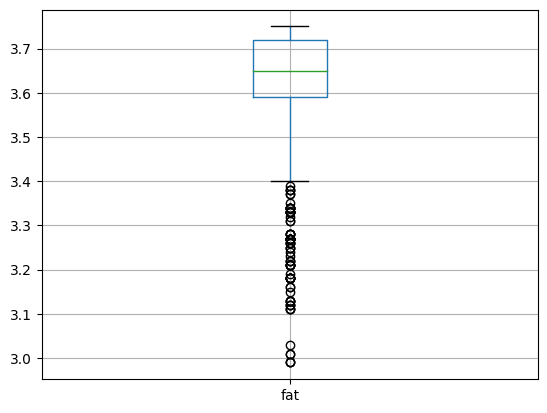

In [70]:
# построим диаграмму размаха
ferma_main.boxplot(column='fat')
plt.show()

In [71]:
# получим описательные статистики жирности молока (%) для cow_buy
cow_buy['fat'].describe()

count    16.000000
mean      3.571875
std       0.141620
min       3.340000
25%       3.415000
50%       3.585000
75%       3.692500
max       3.770000
Name: fat, dtype: float64

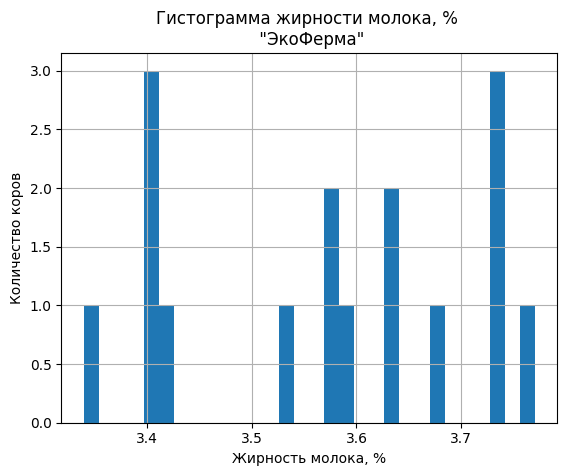

In [72]:
# построим гистограмму жирности молока для cow_buy
cow_buy['fat'].plot(
    kind='hist',
    grid=True,
    bins=30,
    title = 'Гистограмма жирности молока, % \n "ЭкоФерма"',
)
plt.xlabel('Жирность молока, %')
plt.ylabel('Количество коров')

plt.show()

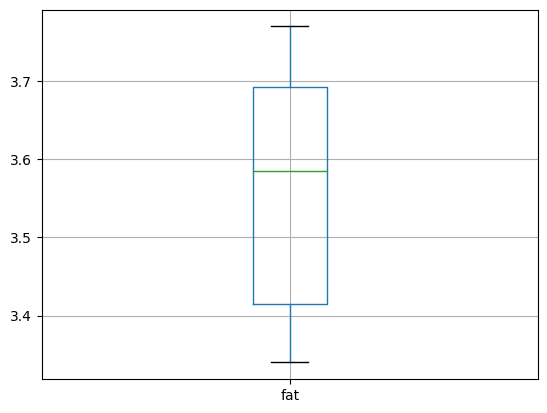

In [73]:
# построим диаграмму размаха
cow_buy.boxplot(column='fat')
plt.show()

Диаграмма размаха показывает выбросы в значениях жирности молока от фермерских коров, но минимальное значение жирности 2,99% всё-таки не является аномалией, такое иногда случается.

Даграмма размаха жирности молока от "ЭкоФермы" показывает распределение без выбросов.

Данные выглядят корректно.

Средняя жирность молока у фермерских коров немного выше (≈3,60%), чем у коров с "ЭкоФермы" (≈3,57%).

### Содержание белков в молоке

In [74]:
# получим описательные статистики содержания белков в молоке (%) для ferma_main
ferma_main['protein'].describe()

count    628.000000
mean       3.075670
std        0.002551
min        3.069000
25%        3.074000
50%        3.076000
75%        3.077000
max        3.085000
Name: protein, dtype: float64

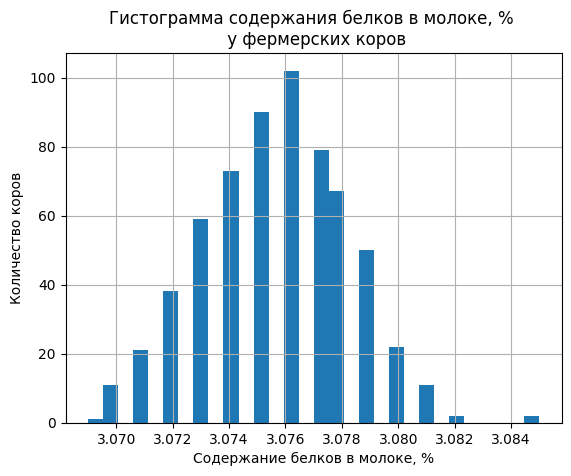

In [75]:
# построим гистограмму содержания белков в молоке (%) для ferma_main
ferma_main['protein'].plot(
    kind='hist',
    grid=True,
    bins=30,
    title = 'Гистограмма содержания белков в молоке, % \n у фермерских коров',
)
plt.xlabel('Содержание белков в молоке, %')
plt.ylabel('Количество коров')

plt.show()

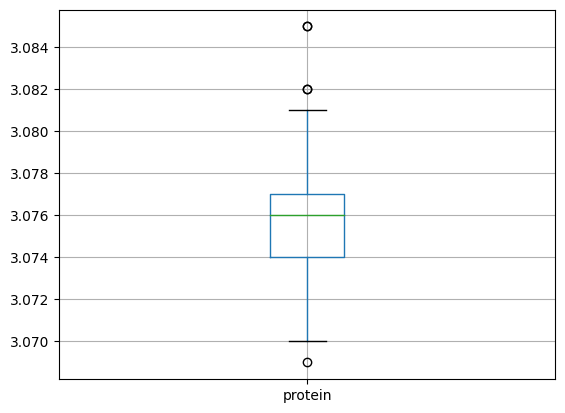

In [76]:
# построим диаграмму размаха
ferma_main.boxplot(column='protein')
plt.show()

In [77]:
# получим описательные статистики содержания белков в молоке (%) для cow_buy
cow_buy['protein'].describe()

count    16.000000
mean      3.068250
std       0.011264
min       3.046000
25%       3.059500
50%       3.073500
75%       3.076750
max       3.081000
Name: protein, dtype: float64

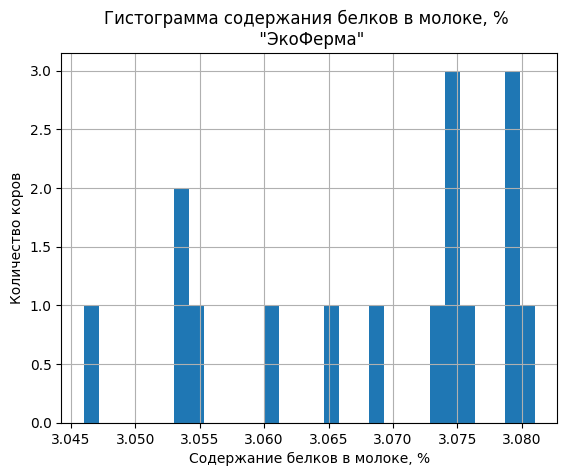

In [78]:
# построим гистограмму содержания белков в молоке (%) для cow_buy
cow_buy['protein'].plot(
    kind='hist',
    grid=True,
    bins=30,
    title = 'Гистограмма содержания белков в молоке, % \n "ЭкоФерма"',
)
plt.xlabel('Содержание белков в молоке, %')
plt.ylabel('Количество коров')

plt.show()

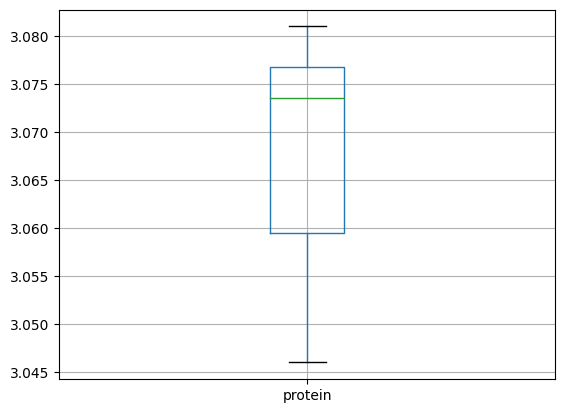

In [79]:
# построим диаграмму размаха
cow_buy.boxplot(column='protein')
plt.show()

Данные корректны.
Выбросы значений содержания белков в молоке фермерских коров не значительны и не являются аномалией. Для коров "ЭкоФермы" выбросов в значениях не обнаружено.

Из-за большего размера выборки график распределения белков в молоке по фермерским коровам выглядит более естественно.  

Среднее содержание белка в молоке у фермерских коров немного выше (≈3,08%), чем у коров "ЭкоФермы" (≈3,07%).

### Вкус молока

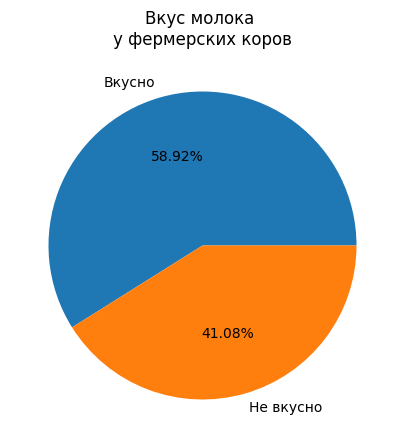

In [80]:
# построим круговую диаграмму вкуса молока для ferma_main
pie(ferma_main['taste_milk'], 'Вкус молока \nу фермерских коров')

Фермер оценивает, что около 59% его коров дают вкусное молоко, остальные - невкусное.

### Возраст коров

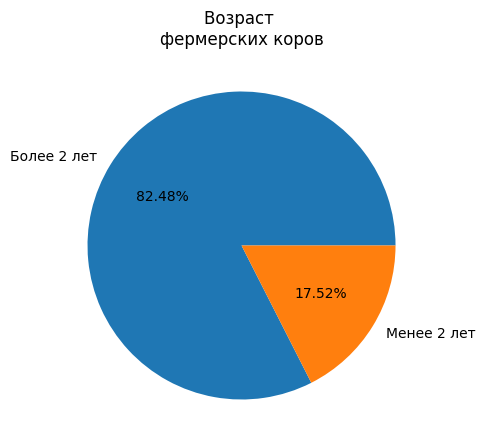

In [81]:
# построим круговую диаграмму возраста коров для ferma_main
pie(ferma_main['age'], 'Возраст \nфермерских коров')

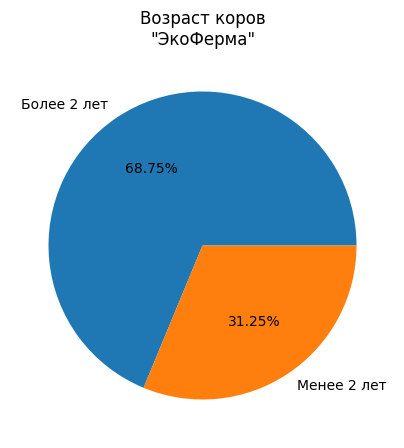

In [82]:
# построим круговую диаграмму возраста коров для cow_buy
pie(cow_buy['age'], 'Возраст коров\n"ЭкоФерма"')

Примерно 82% фермерских коров старше 2 лет, у коров с "Экофермы" этот показатель ≈69%.

### Имя быка - отца коровы

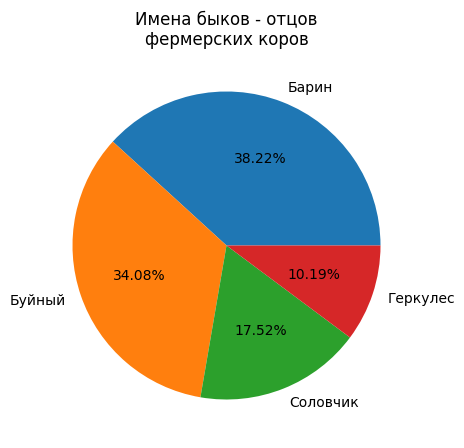

In [83]:
# построим круговую диаграмму с именами отцов коров для ferma_main
pie(ferma_main['name_father'], 'Имена быков - отцов\nфермерских коров')

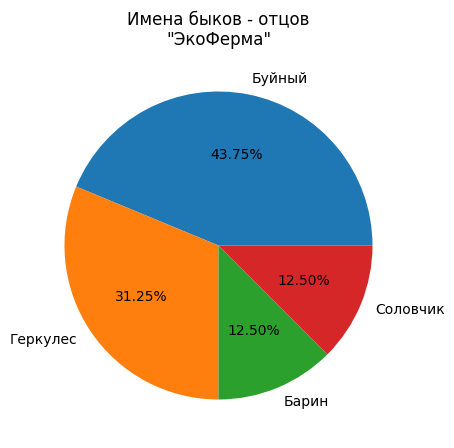

In [84]:
# построим круговую диаграмму с именами отцов коров для cow_buy
pie(cow_buy['name_father'], 'Имена быков - отцов\n"ЭкоФерма"')

Для осеменения фермерских коров и коров "ЭкоФермы" использовалось семя четырёх быков: Барин, Буйный, Геркулес, Соловчик. 

Бóльшая часть фермерских коров была произверена из семени Барина и Буйного, на "ЭкоФерме" использовалось преимущественно семя Буйного и Геркулеса.

**Вывод:**

Исследовательский анализ завершен. В датафрейме `ferma_main` в столбце `'milk_yield'` был зафиксирован значительный выброс. Аномальная строка успешно удалена. Данные корректны.

Для улучшения качества анализа, необходимо следующее:
1. Получить от "ЭкоФермы": 
- `id` каждой коровы (или иную уникальную информацию), чтобы на этапе предобработки понимать, где явные дубликаты, а где совпадающие характеристики разных коров.
- Параметры корма: ЭКЕ, Сырой протеин, СПО.
- Характеристики молока: Удой, Вкус.
2. Уточнить: Барин, Буйный, Геркулес, Соловчик для фермерских коров и для коров "ЭкоФермы" - это одни и те же быки-осеменители или по совпанению они "тёзки"?
3. Получить от фермерского хозяйства «Вольный луг»:
- методику определения вкуса молока фермерских коров для оценки её объективности.
- пояснения к столбцу "СПО (Сахаро-протеиновое соотношение)": почему отсутствуют значения 0.87, 0.91, 0.92? Если значения имеются, необходимо дополнить таблицу. 

## Корреляционный анализ

In [85]:
# создадим функцию для присвоения категории корреляци по шкале Чеддока
# на вход принимаем корреляцию в виде числа, например: 0.57
def corr_chaddock(corr):
    a = round(corr, 2)
    if abs(corr) < 0.1:
        return (f'отсутствует ({a})')
    
    if 0.1 < abs(corr) <= 0.3:
        return (f'слабая ({a})')
    
    if 0.3 < abs(corr) <= 0.5:
        return (f'умеренная ({a})')
    
    if 0.5 < abs(corr) <= 0.7:
        return (f'заметная ({a})')
    
    if 0.7 < abs(corr) <= 0.9:
        return (f'высокая ({a})')
    
    if 0.9 < abs(corr) <= 1:
        return (f'весьма высокая ({a})')

In [86]:
# для построения диаграмм рассеяния создадим функцию
# в качестве аргумента принимаем номер количественного признака из списка "a" от 1 до 5.
def scatter(feature_num):
    # список количественных признаков
    a = ['energy_feed_unit', 'raw_protein', 'suga_protein_ratio', 'fat', 'protein']
    
    # список категориальных признаков
    b = ['breed', 'pasture_type', 'breed_father', 'taste_milk', 'age', 'name_father']
    
    for i in range(feature_num-1, feature_num):
        for j in range(len(b)):
            sns.scatterplot(
                data=ferma_main, 
                x=a[i], 
                y="milk_yield", 
                hue=b[j],
            )
            plt.show()
            
            for k in ferma_main[b[j]].unique():
                print(k)
                df=ferma_main[ferma_main[b[j]]==k]
                print('Корреляция Кендалла:', corr_chaddock(df['milk_yield'].corr(df[a[i]], method='kendall')))
                print('Корреляция Спирмена:', corr_chaddock(df['milk_yield'].corr(df[a[i]], method='spearman')))
                print()

### Связь между удоем и ЭКЕ

**Построим диаграммы рассеяния: связь между удоем и ЭКЕ для разных категорий.**

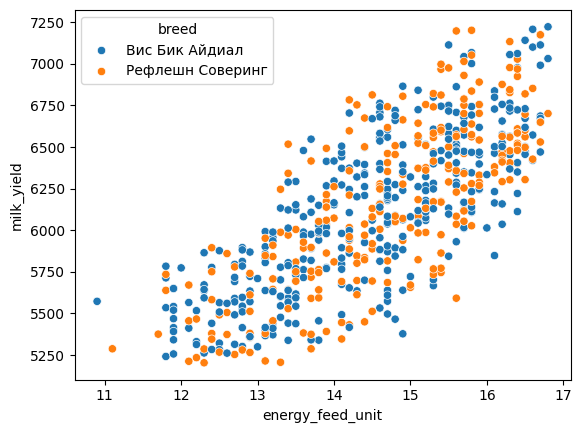

Вис Бик Айдиал
Корреляция Кендалла: заметная (0.57)
Корреляция Спирмена: высокая (0.77)

Рефлешн Соверинг
Корреляция Кендалла: заметная (0.56)
Корреляция Спирмена: высокая (0.76)



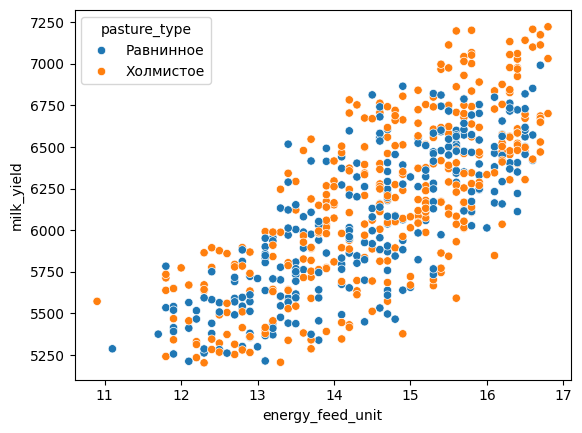

Равнинное
Корреляция Кендалла: заметная (0.59)
Корреляция Спирмена: высокая (0.79)

Холмистое
Корреляция Кендалла: заметная (0.55)
Корреляция Спирмена: высокая (0.75)



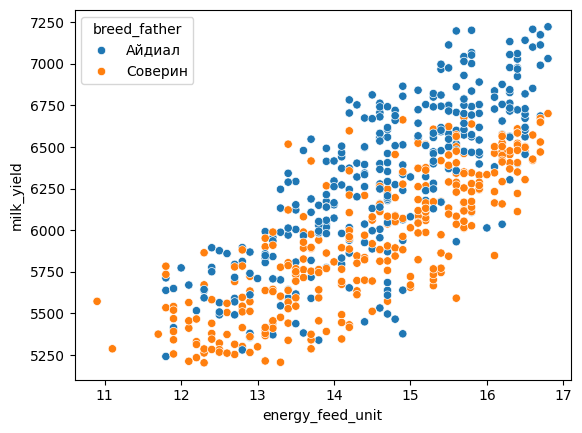

Айдиал
Корреляция Кендалла: заметная (0.59)
Корреляция Спирмена: высокая (0.78)

Соверин
Корреляция Кендалла: заметная (0.63)
Корреляция Спирмена: высокая (0.82)



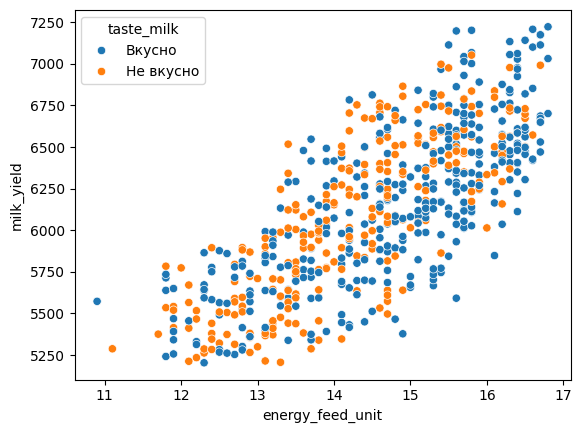

Вкусно
Корреляция Кендалла: заметная (0.56)
Корреляция Спирмена: высокая (0.75)

Не вкусно
Корреляция Кендалла: заметная (0.59)
Корреляция Спирмена: высокая (0.79)



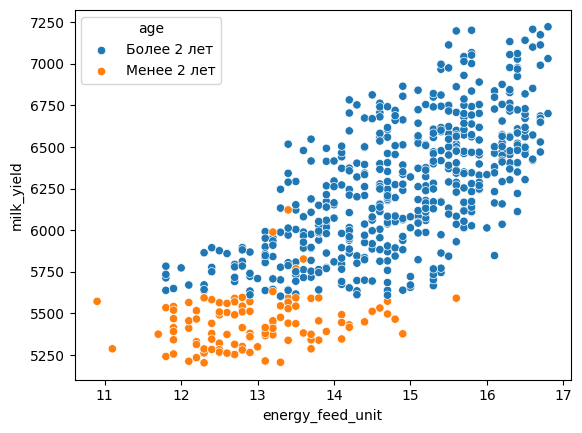

Более 2 лет
Корреляция Кендалла: умеренная (0.48)
Корреляция Спирмена: заметная (0.67)

Менее 2 лет
Корреляция Кендалла: слабая (0.18)
Корреляция Спирмена: слабая (0.25)



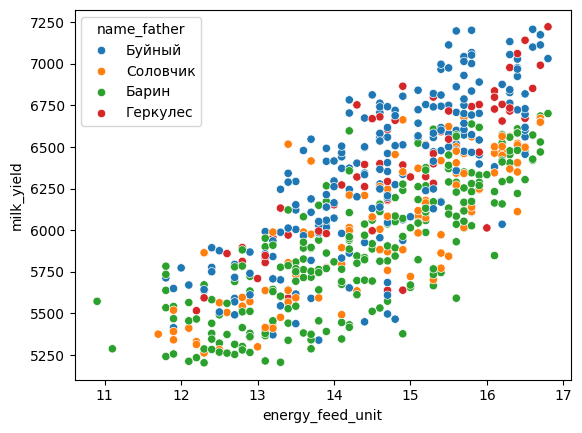

Буйный
Корреляция Кендалла: заметная (0.58)
Корреляция Спирмена: высокая (0.77)

Соловчик
Корреляция Кендалла: заметная (0.64)
Корреляция Спирмена: высокая (0.82)

Барин
Корреляция Кендалла: заметная (0.63)
Корреляция Спирмена: высокая (0.82)

Геркулес
Корреляция Кендалла: заметная (0.67)
Корреляция Спирмена: высокая (0.83)



In [87]:
scatter(1)

**Вывод:**

Между `удоем` и `ЭКЕ` прослеживается нелинейная связь, а скорее параболическая. Наблюдаем положительную корреляцию, преимущественно умеренную по Кендаллу и высокую по Спирмену. Для коров младше двух лет - слабая положительная корреляция.

### Связь между удоем и содержанием сырого протеина в корме

**Построим диаграммы рассеяния: связь между удоем и содержанием сырого протеина в корме для разных категорий.**

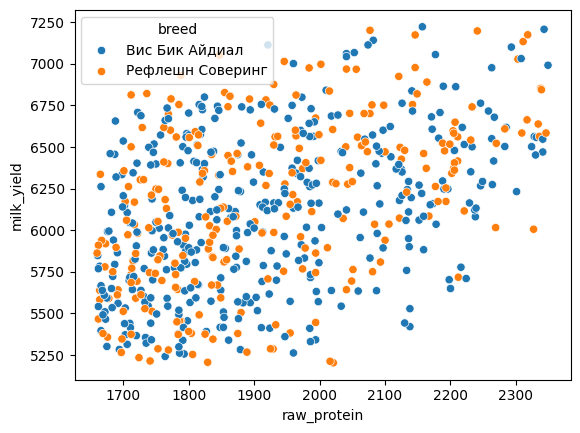

Вис Бик Айдиал
Корреляция Кендалла: слабая (0.28)
Корреляция Спирмена: умеренная (0.41)

Рефлешн Соверинг
Корреляция Кендалла: умеренная (0.33)
Корреляция Спирмена: умеренная (0.48)



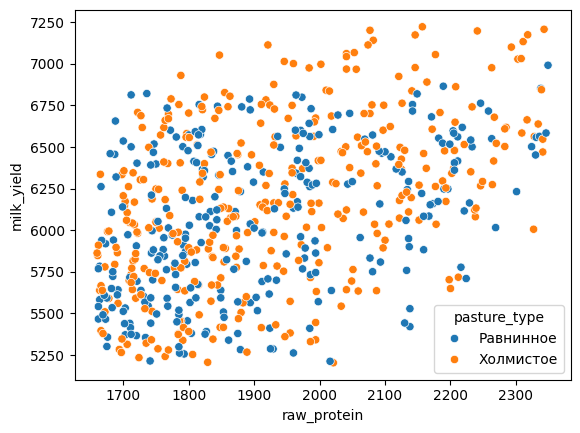

Равнинное
Корреляция Кендалла: слабая (0.27)
Корреляция Спирмена: умеренная (0.4)

Холмистое
Корреляция Кендалла: умеренная (0.31)
Корреляция Спирмена: умеренная (0.46)



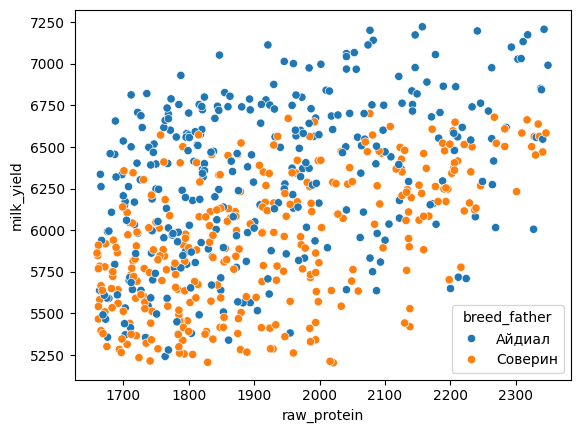

Айдиал
Корреляция Кендалла: слабая (0.29)
Корреляция Спирмена: умеренная (0.42)

Соверин
Корреляция Кендалла: умеренная (0.36)
Корреляция Спирмена: заметная (0.53)



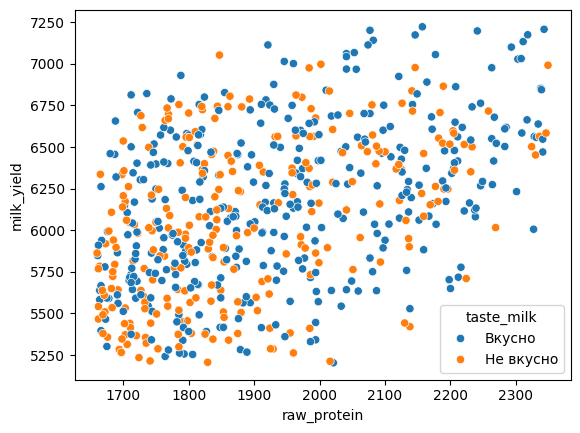

Вкусно
Корреляция Кендалла: слабая (0.29)
Корреляция Спирмена: умеренная (0.43)

Не вкусно
Корреляция Кендалла: слабая (0.29)
Корреляция Спирмена: умеренная (0.44)



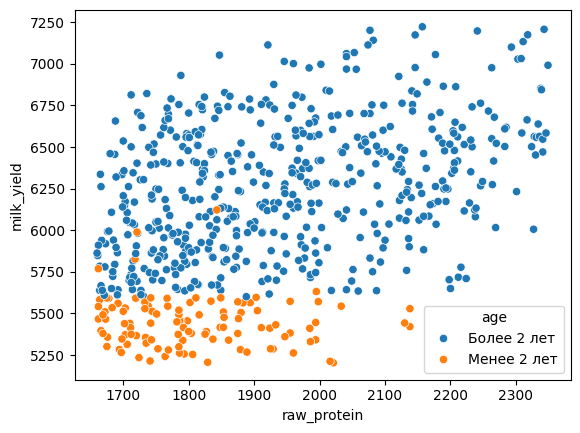

Более 2 лет
Корреляция Кендалла: слабая (0.25)
Корреляция Спирмена: умеренная (0.37)

Менее 2 лет
Корреляция Кендалла: отсутствует (-0.06)
Корреляция Спирмена: отсутствует (-0.09)



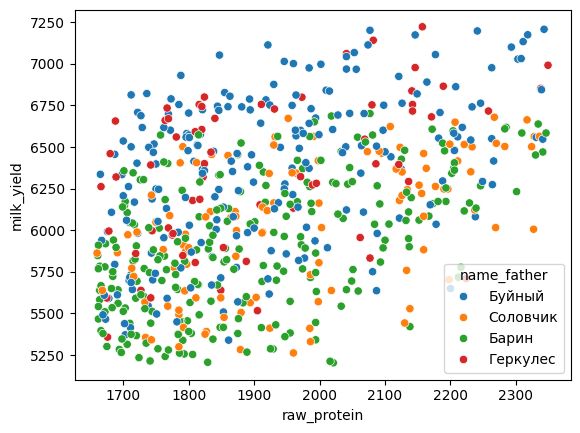

Буйный
Корреляция Кендалла: умеренная (0.31)
Корреляция Спирмена: умеренная (0.45)

Соловчик
Корреляция Кендалла: умеренная (0.38)
Корреляция Спирмена: заметная (0.54)

Барин
Корреляция Кендалла: умеренная (0.32)
Корреляция Спирмена: умеренная (0.48)

Геркулес
Корреляция Кендалла: умеренная (0.34)
Корреляция Спирмена: умеренная (0.48)



In [88]:
scatter(2)

**Вывод:**

Между удоем и содержанием сырого протеина зависимость может быть линейной, на графике наблюдаем высокую дисперсию. Корреляция преимущественно положительная слабая-умеренная. Для коров младше двух лет корреляция отсутствует.

### Связь между удоем и СПО в корме

**Построим диаграммы рассеяния: связь между удоем и СПО в корме для разных категорий.**

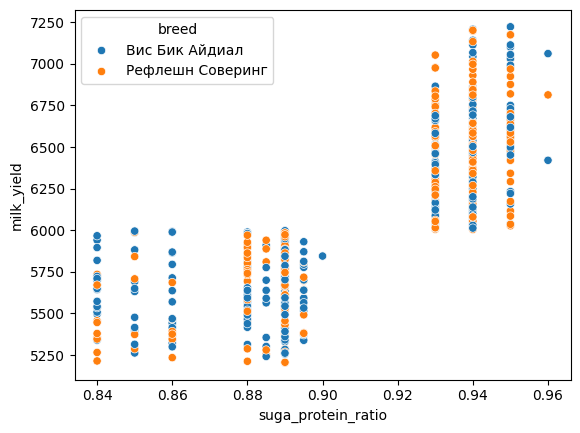

Вис Бик Айдиал
Корреляция Кендалла: заметная (0.6)
Корреляция Спирмена: высокая (0.79)

Рефлешн Соверинг
Корреляция Кендалла: заметная (0.59)
Корреляция Спирмена: высокая (0.77)



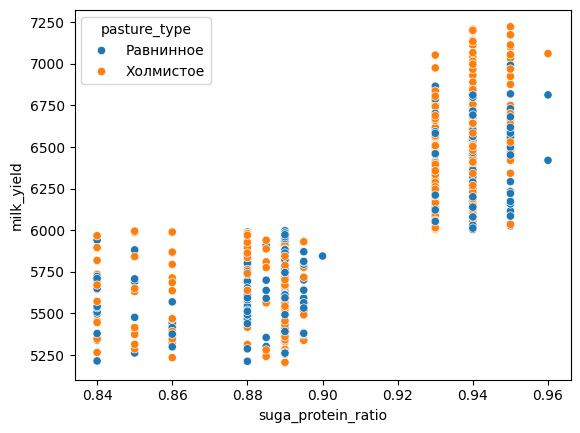

Равнинное
Корреляция Кендалла: заметная (0.62)
Корреляция Спирмена: высокая (0.81)

Холмистое
Корреляция Кендалла: заметная (0.58)
Корреляция Спирмена: высокая (0.77)



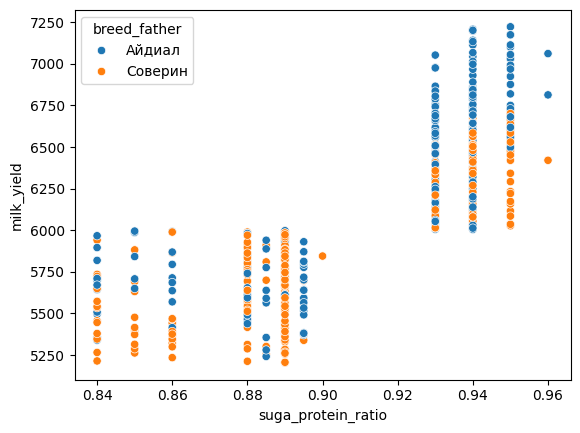

Айдиал
Корреляция Кендалла: заметная (0.59)
Корреляция Спирмена: высокая (0.76)

Соверин
Корреляция Кендалла: заметная (0.63)
Корреляция Спирмена: высокая (0.82)



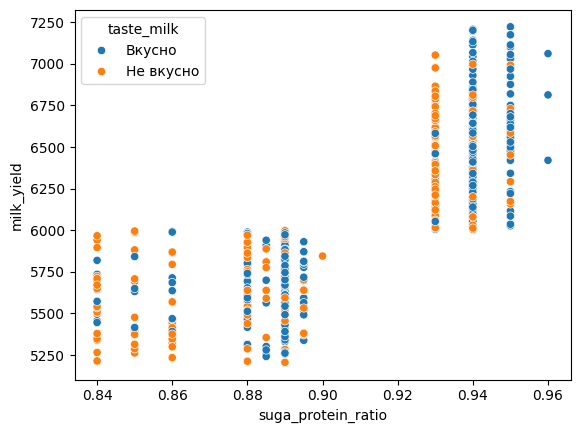

Вкусно
Корреляция Кендалла: заметная (0.61)
Корреляция Спирмена: высокая (0.79)

Не вкусно
Корреляция Кендалла: заметная (0.6)
Корреляция Спирмена: высокая (0.8)



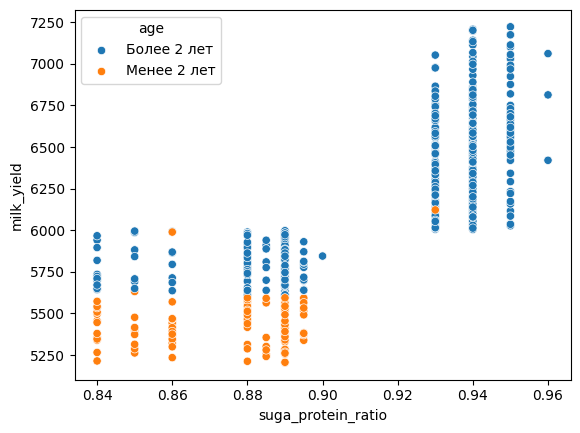

Более 2 лет
Корреляция Кендалла: заметная (0.53)
Корреляция Спирмена: высокая (0.7)

Менее 2 лет
Корреляция Кендалла: отсутствует (0.07)
Корреляция Спирмена: отсутствует (0.09)



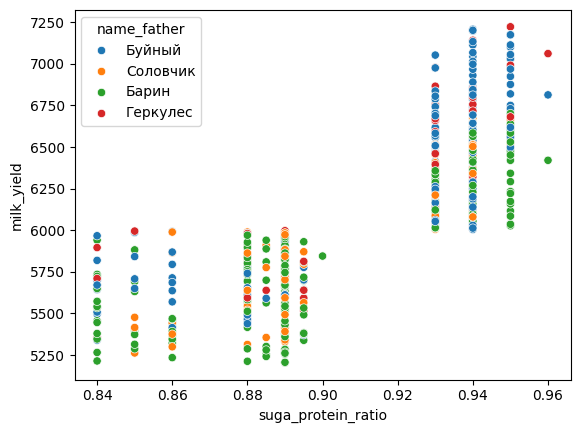

Буйный
Корреляция Кендалла: заметная (0.56)
Корреляция Спирмена: высокая (0.71)

Соловчик
Корреляция Кендалла: заметная (0.64)
Корреляция Спирмена: высокая (0.82)

Барин
Корреляция Кендалла: заметная (0.6)
Корреляция Спирмена: высокая (0.79)

Геркулес
Корреляция Кендалла: заметная (0.59)
Корреляция Спирмена: высокая (0.75)



In [89]:
scatter(3)

**Вывод:**

Между удоем и СПО в корме не прослеживается линейная связь. Корреляция преимущественно положительная заметная-высокая. Для коров младше двух лет корреляция отсутствует. Наблюдаем 2 зоны с разной зависимостью: СПО до 0.91 и более 0.91. Данные интервалы используем для категоризации признака СПО.

### Связь между удоем и жирностью молока

**Построим диаграммы рассеяния: связь между удоем и жирностью молока для разных категорий.**

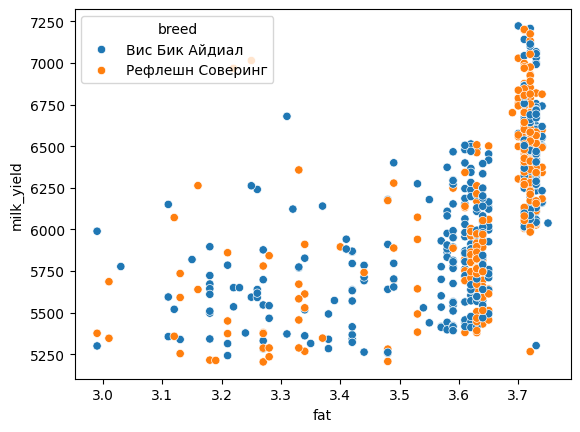

Вис Бик Айдиал
Корреляция Кендалла: заметная (0.52)
Корреляция Спирмена: высокая (0.71)

Рефлешн Соверинг
Корреляция Кендалла: умеренная (0.46)
Корреляция Спирмена: заметная (0.64)



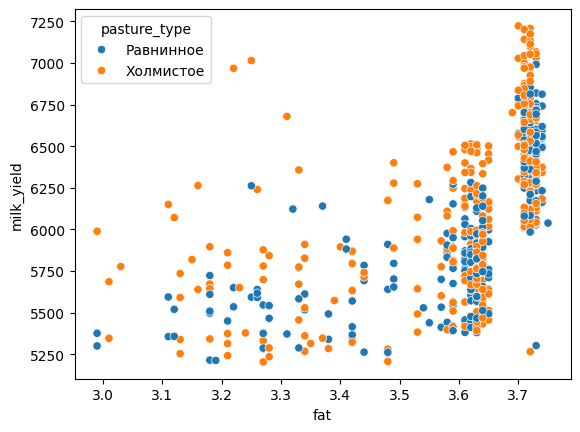

Равнинное
Корреляция Кендалла: заметная (0.59)
Корреляция Спирмена: высокая (0.78)

Холмистое
Корреляция Кендалла: умеренная (0.45)
Корреляция Спирмена: заметная (0.63)



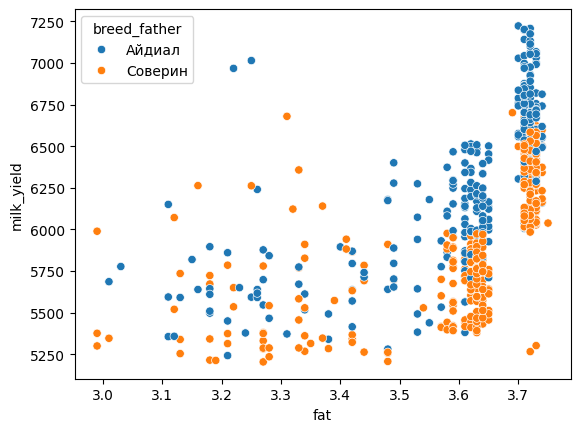

Айдиал
Корреляция Кендалла: заметная (0.54)
Корреляция Спирмена: высокая (0.73)

Соверин
Корреляция Кендалла: заметная (0.54)
Корреляция Спирмена: высокая (0.73)



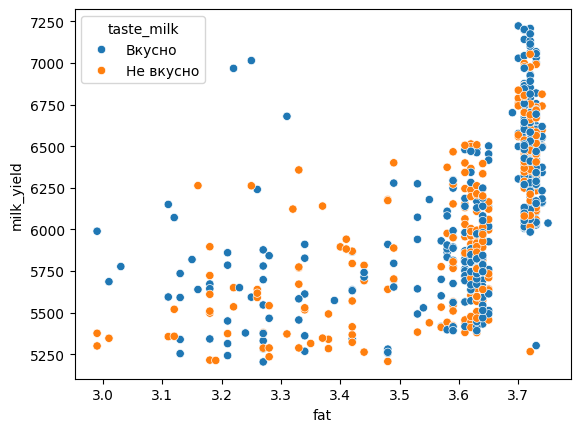

Вкусно
Корреляция Кендалла: умеренная (0.46)
Корреляция Спирмена: заметная (0.65)

Не вкусно
Корреляция Кендалла: заметная (0.53)
Корреляция Спирмена: высокая (0.72)



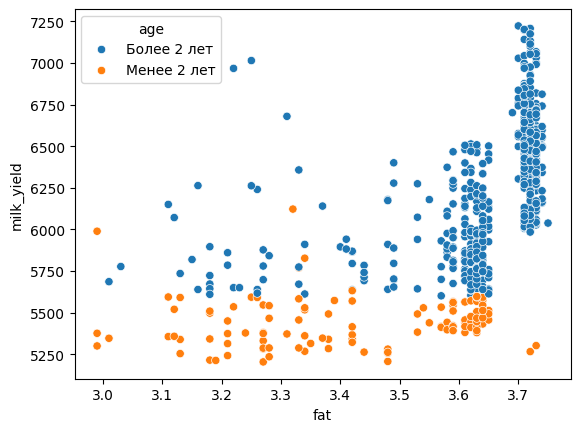

Более 2 лет
Корреляция Кендалла: умеренная (0.41)
Корреляция Спирмена: заметная (0.59)

Менее 2 лет
Корреляция Кендалла: слабая (0.17)
Корреляция Спирмена: слабая (0.24)



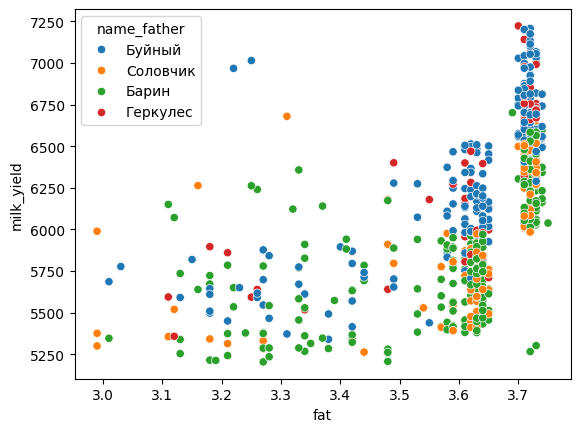

Буйный
Корреляция Кендалла: заметная (0.55)
Корреляция Спирмена: высокая (0.74)

Соловчик
Корреляция Кендалла: заметная (0.53)
Корреляция Спирмена: высокая (0.71)

Барин
Корреляция Кендалла: заметная (0.52)
Корреляция Спирмена: высокая (0.71)

Геркулес
Корреляция Кендалла: заметная (0.5)
Корреляция Спирмена: высокая (0.71)



In [90]:
scatter(4)

Признак "Жирность молока" можно сделать категориальным. Уточним границы интервалов, где заметно разное поведение графика.

In [91]:
ferma_main.query('3.5 < fat < 3.65')['fat'].value_counts().sort_index()

3.53     6
3.54     1
3.55     2
3.57     7
3.58    11
3.59    25
3.61    35
3.62    31
3.63    37
3.64    36
Name: fat, dtype: int64

In [92]:
ferma_main.query('fat > 3.6')['fat'].value_counts().sort_index()

3.61     35
3.62     31
3.63     37
3.64     36
3.65     19
3.69      1
3.70     13
3.71     78
3.72    112
3.73     78
3.74     16
3.75      1
Name: fat, dtype: int64

**Вывод:**

Между удоем и жирностью молока не прослеживается линейная связь. Корреляция положительная, преимущественно заметная-высокая. Для коров младше двух лет корреляция слабая. Наблюдаем 3 зоны с разной зависимостью: содержание жира до `3.55%, 3.55% - 3.69%, более 3.69%`. Данные интервалы используем для категоризации признака жирности молока.

### Cвязь между удоем и содержанием белков в молоке

**Построим диаграммы рассеяния: связь между удоем и содержанием белков в молоке для разных категорий.**

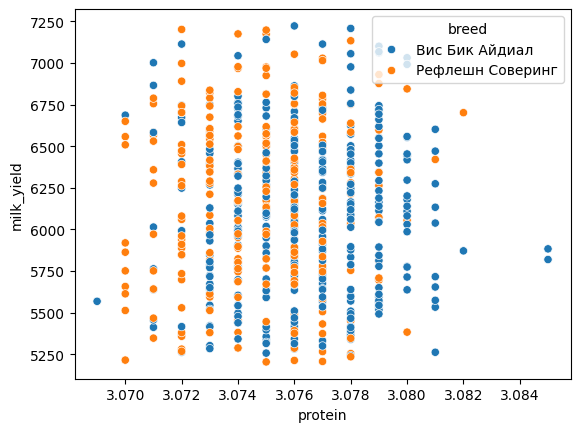

Вис Бик Айдиал
Корреляция Кендалла: отсутствует (0.02)
Корреляция Спирмена: отсутствует (0.02)

Рефлешн Соверинг
Корреляция Кендалла: отсутствует (0.01)
Корреляция Спирмена: отсутствует (0.01)



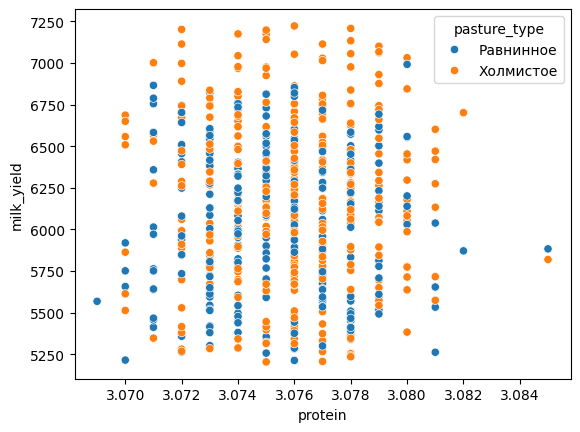

Равнинное
Корреляция Кендалла: отсутствует (0.0)
Корреляция Спирмена: отсутствует (0.01)

Холмистое
Корреляция Кендалла: отсутствует (-0.02)
Корреляция Спирмена: отсутствует (-0.03)



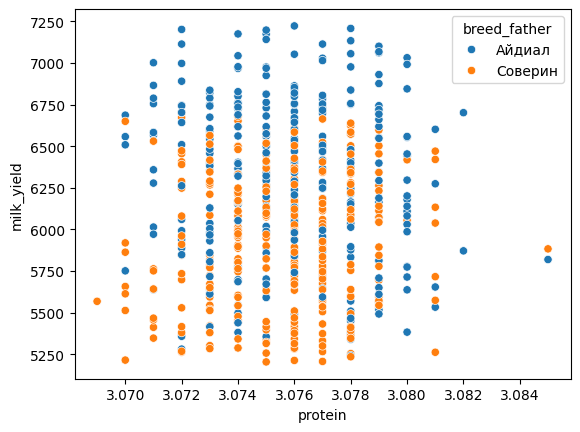

Айдиал
Корреляция Кендалла: отсутствует (-0.07)
Корреляция Спирмена: отсутствует (-0.1)

Соверин
Корреляция Кендалла: отсутствует (0.04)
Корреляция Спирмена: отсутствует (0.06)



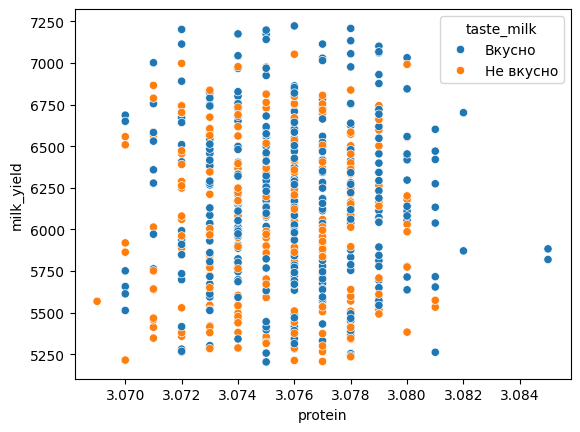

Вкусно
Корреляция Кендалла: отсутствует (-0.04)
Корреляция Спирмена: отсутствует (-0.06)

Не вкусно
Корреляция Кендалла: отсутствует (0.03)
Корреляция Спирмена: отсутствует (0.04)



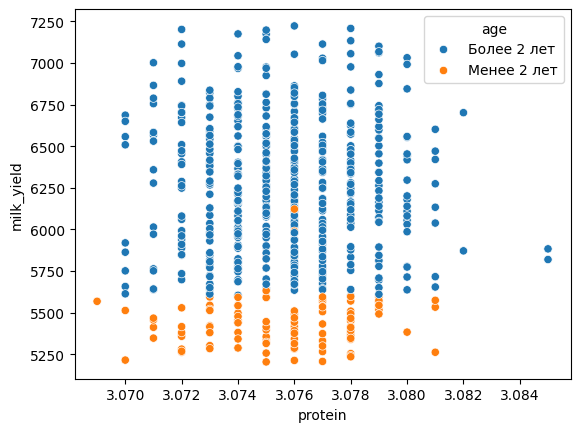

Более 2 лет
Корреляция Кендалла: отсутствует (-0.01)
Корреляция Спирмена: отсутствует (-0.02)

Менее 2 лет
Корреляция Кендалла: отсутствует (0.1)
Корреляция Спирмена: слабая (0.13)



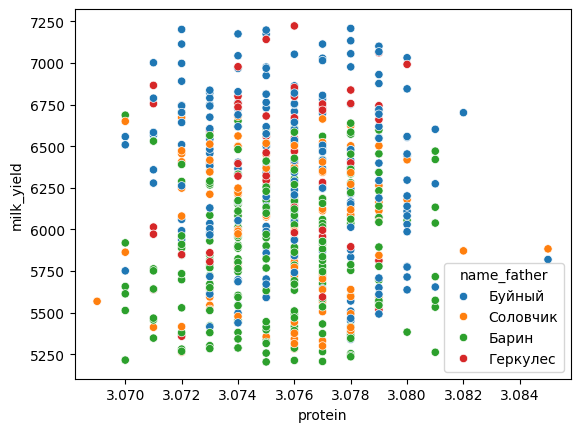

Буйный
Корреляция Кендалла: отсутствует (-0.09)
Корреляция Спирмена: слабая (-0.14)

Соловчик
Корреляция Кендалла: отсутствует (-0.07)
Корреляция Спирмена: отсутствует (-0.09)

Барин
Корреляция Кендалла: отсутствует (0.05)
Корреляция Спирмена: отсутствует (0.07)

Геркулес
Корреляция Кендалла: отсутствует (0.08)
Корреляция Спирмена: слабая (0.12)



In [93]:
scatter(5)

**Вывод:**

Между удоем и содержанием белков в молоке связь не прослеживается. Корреляция преимущественно отсутствует. 

**Итог:**

- Весьма высоких (более 0.9) корреляций нет, мультиколлинеарность маловероятна.
- Связи между удоем и: ЭКЕ, СПО, жирностью молока не выглядят линейными.
- - Поскольку между удоем и ЭКЕ прослеживается зависимость, похожая на параболическую, необходимо значения признака ЭКЕ возвести квадрат, чтобы учесть кривизну.
- - СПО разделим на интервалы до 0.91 и более 0.91. Создадим новый категориальный признак. 
- - Жирность молока разделим на интервалы: до 3.55%, 3.55% - 3.69%, более 3.69%. Создадим новый категориальный признак.
- Очевидно, что возраст влияет на удой: молодые коровы дают меньше молока. 
- Корм с высоким СПО используется для коров старше двух лет.


## Обучение модели линейной регрессии

Обучим три модели простой линейной регрессии.

In [94]:
# создадим списки для метрик, функция для каждой модели будет добавлять туда метрики
# затем из списков сформируем сравнительную таблицу метрик
R2_list, MAE_list, MSE_list, RMSE_list, avg_residuals_list = [], [], [], [], []

In [95]:
# создадим функцию для расчета линейной регрессии
# в качестве аргументов принимаем:
# "cat_col_names" - список с названиями сталбцов категориальных признаков.
# "num_col_names" - список с названиями сталбцов количественных признаков. 
# "alpha" - если параметр задан, то вычисляется доверительный интервал с заданной обеспеченностью alpha

def lin_reg(cat_col_names, num_col_names, alpha=False):
    
    # удалим из данных столбцы, которые не будем использовать для обучения первой модели
    X = ferma_main.drop('milk_yield', axis=1) # входные признаки
    y = ferma_main['milk_yield']              # целевой признак
    
    # разделим данные на тренировочные и тестовые, зафиксируем random_state
    X_train, X_test, y_train, y_test = train_test_split(
        X, 
        y, 
        random_state=RANDOM_STATE)
    
    ## Кодирование признаков ------------------------------------------------------
    
    # создадим переменную с экземпляром класса OneHotEncoder()
    # включим параметр для избегания появления дамми-ошибок, отключим sparse-отображение
    encoder = OneHotEncoder(drop='first', sparse=False)
    
    # обучим и трансформируем категориальные признаки из тренировочной выборки 
    X_train_ohe = encoder.fit_transform(X_train[cat_col_names]) 
    
    # преобразуем категориальные признаки в тестовой выборке
    X_test_ohe = encoder.transform(X_test[cat_col_names])
    
    # получим от кодировщика список новых столбцов и сохраним в новой переменной 
    encoder_col_names = encoder.get_feature_names_out()  
    
    ## Масштабирование признаков ---------------------------------------------------
    
    # создаём переменную с экземпляром класса StandartScaler()
    scaler = StandardScaler()
    
    # обучим и трансформируем количественные признаки из тренировочной выборки 
    X_train_scaled = scaler.fit_transform(X_train[num_col_names])
    
    # выполните преобразование количественных признаков в тестовой выборке
    X_test_scaled = scaler.transform(X_test[num_col_names])
    
    ## объедияем преобразованные данные---------------------------------------------
    
    # создаём тренировочный и тестовый датафреймы из закодированных и отмасштабированных данных
    # для данных OHE названия столбцов укажем из переменной encoder_col_names
    
    X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
    X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)
    
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)
    
    # объединяем все преобразованные данные в тренировочный и тестовый датафреймы
    # сбрасываем индексы в датафрейме с числовыми индексами, чтобы избежать ошибок
    
    X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
    X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)
    
    ## обучение модели линейной регрессии------------------------------------------
    
    # инициализируем модель линейной регрессии
    model_lr = LinearRegression() 
    
    # обучите модель на тренировочных данных
    model_lr.fit(X_train, y_train) 
    
    # получим предсказания модели на тестовых данных 
    # сохраним результат в переменную predictions
    predictions = model_lr.predict(X_test) 
    
    ## метрики---------------------------------------------------------------------
    
    # рассчитаем R2 и выведем значение
    # запишем R2 в список для сравнительной таблицы
    R2 = r2_score(y_test, predictions).round(2)
    print("R2 LinearRegression =", R2)
    R2_list.append(R2)
    
    # рассчитаем MAE и выведем значение
    # запишем MAE в список для сравнительной таблицы
    MAE = mean_absolute_error(y_test, predictions).round(2)
    print("MAE LinearRegression =", MAE)
    MAE_list.append(MAE)
    
    # рассчитаем MSE и выведем значение
    # запишем MSE в список для сравнительной таблицы
    MSE = mean_squared_error(y_test, predictions).round(2)
    print("MSE LinearRegression =", MSE) 
    MSE_list.append(MSE)
    
    # рассчитаем RMSE и выведем значение
    # запишем RMSE в список для сравнительной таблицы
    RMSE = mean_squared_error(y_test, predictions, squared=False).round(2)
    print("RMSE LinearRegression =", RMSE)
    RMSE_list.append(RMSE)

    ## анализ остатков------------------------------------------------------------
    
    # рассчитаем остатки
    residuals = y_test - predictions
    
    # построим графики по количественным признакам — гистограмму частотности 
    # распределения и диаграмму рассеяния
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
    axes[0].hist(residuals, bins=20)
    axes[0].set_title('Гистограмма распределения остатков')
    axes[0].set_xlabel('Остатки')
    
    axes[1].scatter(predictions, residuals)
    axes[1].set_xlabel('Предсказания модели')
    axes[1].set_ylabel('Остатки')
    axes[1].set_title('Анализ дисперсии')
    
    plt.show()
    
    # вычислим среднее значение остатков
    avg_residuals = residuals.mean().round(2)
    print('Среднее значение остатков:', avg_residuals)
    
    # добавим среднее значение остатков в список для сравнительной таблицы
    avg_residuals_list.append(avg_residuals)
    
    ## вычислим доверительный интервал прогноза-----------------------------------
    if alpha:
        print('\nДоверительный интервал прогноза:')
        print(get_conf_int(alpha, model_lr, X_train, y_train))
    
    # выведем обученную модель 
    return  [scaler, encoder, model_lr, encoder_col_names]

In [96]:
# функция для вычисления доверительного интервала
# "alpha" - обеспеченность, например 0.05 для доверительного интервала 95%
# "lr" - обученная модель линейной регрессии, lin_model = LinearRegression().fit(X_train, Y_train)
# "X" - X_train
# "y" - y_train
def get_conf_int(alpha, lr, X, y):
    coefs = np.r_[[lr.intercept_], lr.coef_]
    X_aux = X.copy()
    X_aux.insert(0, 'const', 1)
    dof = -np.diff(X_aux.shape)[0]
    mse = np.sum((y - lr.predict(X)) ** 2) / dof
    var_params = np.diag(np.linalg.inv(X_aux.T.dot(X_aux)))
    t_val = st.t.isf(alpha/2, dof)
    gap = t_val * np.sqrt(mse * var_params)

    return pd.DataFrame({
        'lower': coefs - gap, 'upper': coefs + gap
    }, index=X_aux.columns)

### Первая модель

Подготовим данные датасета ferma_main.csv и обучим на них первую модель `LinearRegression`. 

В качестве целевого признака используем: 
- Удой (`milk_yield`).

В качестве входных количественных признаков используем:
- ЭКЕ (`energy_feed_unit`), для начала не будем возводить в квадрат, предположим, что зависимость линейна. Использование показателя ЭКЕ выглидит логично: чтобы увеличить удой повышаем питательность корма (ЭКЕ). ЭКЕ относится к характеристикам корма наряду с содержанием сырого протеина в корме и СПО.
- Содержание сырого протеина в корме (`raw_protein`).


В качестве входных категориальных признаков используем:
- Порода коровы (`breed`)
- Тип пастбища (`pasture_type`)
- Порода быка - отца коровы (`breed_father`)
- Возраст коровы (`age`)

R2 LinearRegression = 0.71
MAE LinearRegression = 189.22
MSE LinearRegression = 59936.74
RMSE LinearRegression = 244.82


C:\Users\Anton\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


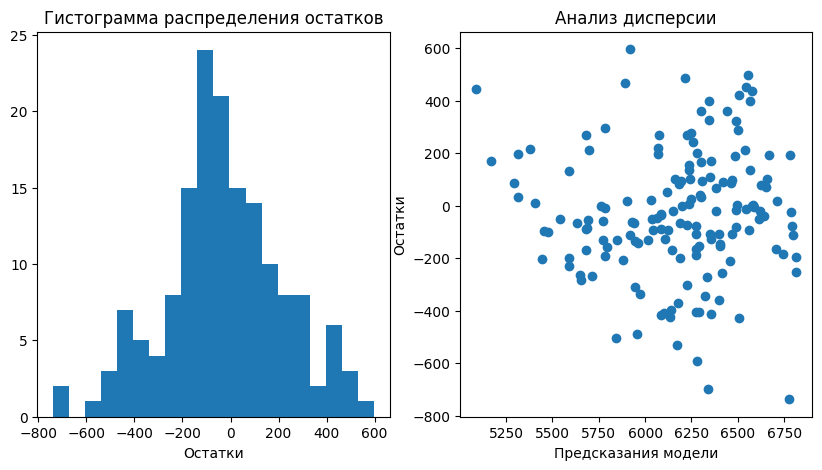

Среднее значение остатков: -29.96


In [97]:
# создадим список категориальных признаков
cat_col_names = ['breed', 
                 'pasture_type', 
                 'breed_father', 
                 'age', 
                ]

# создадим список количественных признаков
num_col_names = ['energy_feed_unit', 'raw_protein']

# обучим модель линейной регрессии и выведем результаты её работы
[scaler, encoder, model_lr, encoder_col_names] = lin_reg(cat_col_names, num_col_names)

**Вывод:**

- R2 = 0.71. Это неплохой показатель. 
- Распределение остатков близко к нормальному. Есть смещение в отрицительную сторону на -29,96. Прогноз модели занижает удой. - - График дисперсии указывает на наличие гетероскедастичности (непостоянства модели). До 6000 один уровень разброса, после 6000 - выше.

Необходимо ввести дополнительные признаки, чтобы модель работала точнее.

### Вторая модель

СПО и Удой связаны нелинейно. На их диаграмме рассеяния наблюдения сгруппированы в два кластера. Чтобы устранить нелинейность, преобразуем СПО в категориальный бинарный признак, взяв за границу кластера СПО = 0.91.

In [98]:
# создадим новый столбец 'suga_protein_ratio_cat' с категориальным признаком СПО
# если СПО >= 0,91, то категория "1", иначе категория "0"
ferma_main['suga_protein_ratio_cat'] = np.where(ferma_main['suga_protein_ratio']>= 0.91, 1, 0)

Удой и ЭКЕ связаны нелинейно. Чтобы исключить нелинейность введем новый признак `'energy_feed_unit_cat'`, где все значения ЭКЕ возведём в квадрат.

In [99]:
# создадим новый столбец 'energy_feed_unit_sqr' с количественным признаком ЭКЕ
ferma_main['energy_feed_unit_sqr'] = ferma_main['energy_feed_unit']**2

In [100]:
# выведем первые строки ferma_main
ferma_main.head(10)

id  milk_yield  energy_feed_unit  raw_protein  suga_protein_ratio  \
0   1        5863              14.2         1743               0.890   
1   2        5529              12.8         2138               0.890   
2   3        5810              14.0         1854               0.885   
3   4        5895              12.4         2012               0.885   
4   5        5302              12.8         1675               0.885   
5   6        5254              12.7         1806               0.885   
6   7        5910              13.2         1792               0.885   
7   8        6179              14.7         1806               0.930   
8   9        6783              14.2         1918               0.940   
9  10        5339              13.4         1791               0.895   

              breed pasture_type breed_father   fat  protein taste_milk  \
0    Вис Бик Айдиал    Равнинное       Айдиал  3.58    3.076     Вкусно   
1    Вис Бик Айдиал    Равнинное      Соверин  3.54    3.079     Вкусно   
2  Рефлешн Соверинг    Холмистое      Соверин  3.59    3.074  Не вкусно   
3  Рефлешн Соверинг    Холмистое       Айдиал  3.40    3.075  Не вкусно   
4    Вис Бик Айдиал    Равнинное      Соверин  3.73    3.073     Вкусно   
5  Рефлешн Соверинг    Холмистое      Соверин  3.13    3.078     Вкусно   
6    Вис Бик Айдиал    Равнинное      Соверин  3.48    3.077     Вкусно   
7    Вис Бик Айдиал    Равнинное       Айдиал  3.55    3.076     Вкусно   
8  Рефлешн Соверинг    Холмистое       Айдиал  3.71    3.077     Вкусно   
9    Вис Бик Айдиал    Холмистое      Соверин  3.13    3.075     Вкусно   

           age name_father  suga_protein_ratio_cat  energy_feed_unit_sqr  
0  Более 2 лет      Буйный                       0                201.64  
1  Менее 2 лет    Соловчик                       0                163.84  
2  Более 2 лет       Барин                       0                196.00  
3  Более 2 лет      Буйный                       0                153.76  
4  Менее 2 лет       Барин                       0                163.84  
5  Менее 2 лет       Барин                       0                161.29  
6  Более 2 лет    Соловчик                       0                174.24  
7  Более 2 лет    Геркулес                       1                216.09  
8  Более 2 лет      Буйный                       1                201.64  
9  Менее 2 лет       Барин                       0                179.56

In [101]:
# выведем информацию о датафрейме
ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 628 entries, 0 to 628
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      628 non-null    int64  
 1   milk_yield              628 non-null    int64  
 2   energy_feed_unit        628 non-null    float64
 3   raw_protein             628 non-null    int64  
 4   suga_protein_ratio      628 non-null    float64
 5   breed                   628 non-null    object 
 6   pasture_type            628 non-null    object 
 7   breed_father            628 non-null    object 
 8   fat                     628 non-null    float64
 9   protein                 628 non-null    float64
 10  taste_milk              628 non-null    object 
 11  age                     628 non-null    object 
 12  name_father             628 non-null    object 
 13  suga_protein_ratio_cat  628 non-null    int32  
 14  energy_feed_unit_sqr    628 non-null    fl

Столбцы созданы успешно.

R2 LinearRegression = 0.82
MAE LinearRegression = 149.04
MSE LinearRegression = 37030.91
RMSE LinearRegression = 192.43


C:\Users\Anton\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


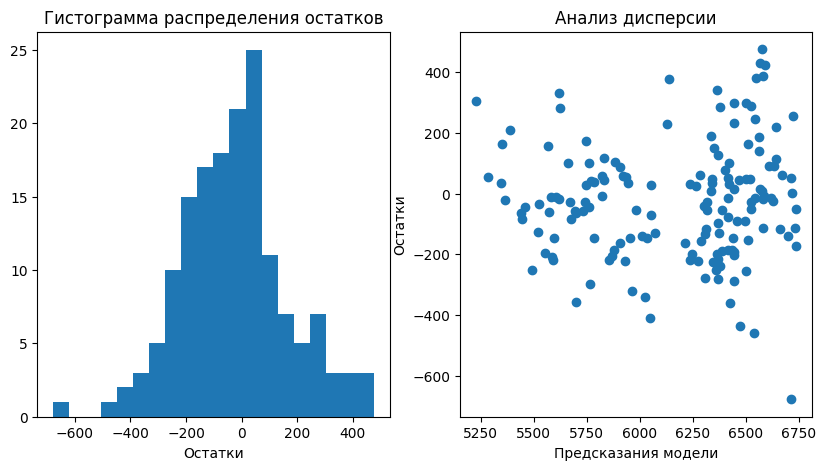

Среднее значение остатков: -24.37


In [102]:
# создадим список категориальных признаков
cat_col_names = ['breed', 
                 'pasture_type', 
                 'breed_father', 
                 'age', 
                 'suga_protein_ratio_cat', # новый категориальный признак
                ]

# создадим список количественных признаков
num_col_names = ['energy_feed_unit_sqr', 'raw_protein'] # заменили 'energy_feed_unit' на 'energy_feed_unit_sqr'

# обучим модель линейной регрессии и выведем результаты её работы
[scaler, encoder, model_lr, encoder_col_names] = lin_reg(cat_col_names, num_col_names)

**Вывод:**

- R2 = 0.82. Это на 11 п.п. выше, чем для первой модели.
- Распределение остатков нельзя назвать нормальным. Есть смещение в отрицительную сторону на -24.37. Прогноз модели занижает удой. Следовательно, есть потенциал для улучшения модели. 
- Дисперсия разброса ошибок стала стабильнее на всём дипазане фактичнеских данных. Наблюдаются две зоны ошибок, разница дисперсии ошибок не систематическая, а выборочная.

В целом, модель уже можно использовать для прогнозирования.

### Третья модель

Добавим в модель линейной регрессии ещё 2 признака:
- Имя отца коровы (`name_father`).
- Жирность молока. Зависимость между удоем и жирностью молока нелинейна, разделим значения жирности на интервалы и создадим новый столбец с категориальным признаком `fat_cat`. Разделим данные по содержанию жира: до 3.55%, 3.55%- 3.69%, более 3.69%.

In [103]:
# создадим функцию, которая по условию будет выводить категорию
def fat_cat(row):
    if row['fat'] <= 3.55:
        return 0
    elif 3.55 < row['fat'] <= 3.69:
        return 1
    else:
        return 2

    
# создадим новый столбец с категориальным признаком `fat_cat`
ferma_main['fat_cat'] = ferma_main.apply(fat_cat, axis=1)

# выведем первые строки ferma_main
ferma_main.head()

id  milk_yield  energy_feed_unit  raw_protein  suga_protein_ratio  \
0   1        5863              14.2         1743               0.890   
1   2        5529              12.8         2138               0.890   
2   3        5810              14.0         1854               0.885   
3   4        5895              12.4         2012               0.885   
4   5        5302              12.8         1675               0.885   

              breed pasture_type breed_father   fat  protein taste_milk  \
0    Вис Бик Айдиал    Равнинное       Айдиал  3.58    3.076     Вкусно   
1    Вис Бик Айдиал    Равнинное      Соверин  3.54    3.079     Вкусно   
2  Рефлешн Соверинг    Холмистое      Соверин  3.59    3.074  Не вкусно   
3  Рефлешн Соверинг    Холмистое       Айдиал  3.40    3.075  Не вкусно   
4    Вис Бик Айдиал    Равнинное      Соверин  3.73    3.073     Вкусно   

           age name_father  suga_protein_ratio_cat  energy_feed_unit_sqr  \
0  Более 2 лет      Буйный                       0                201.64   
1  Менее 2 лет    Соловчик                       0                163.84   
2  Более 2 лет       Барин                       0                196.00   
3  Более 2 лет      Буйный                       0                153.76   
4  Менее 2 лет       Барин                       0                163.84   

   fat_cat  
0        1  
1        0  
2        1  
3        0  
4        2

In [104]:
# получим общую информацию о датафрейме
ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 628 entries, 0 to 628
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      628 non-null    int64  
 1   milk_yield              628 non-null    int64  
 2   energy_feed_unit        628 non-null    float64
 3   raw_protein             628 non-null    int64  
 4   suga_protein_ratio      628 non-null    float64
 5   breed                   628 non-null    object 
 6   pasture_type            628 non-null    object 
 7   breed_father            628 non-null    object 
 8   fat                     628 non-null    float64
 9   protein                 628 non-null    float64
 10  taste_milk              628 non-null    object 
 11  age                     628 non-null    object 
 12  name_father             628 non-null    object 
 13  suga_protein_ratio_cat  628 non-null    int32  
 14  energy_feed_unit_sqr    628 non-null    fl

Новый столбец `'fat_cat'` с категориальным признаком создан успешно.

R2 LinearRegression = 0.81
MAE LinearRegression = 151.92
MSE LinearRegression = 38188.51
RMSE LinearRegression = 195.42


C:\Users\Anton\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


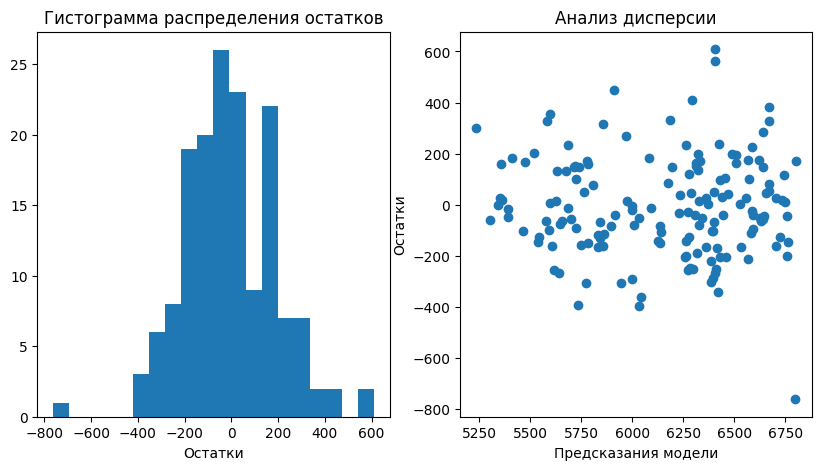

Среднее значение остатков: -6.38

Доверительный интервал прогноза:
                                lower        upper
const                     5608.144065  5791.282801
breed_Рефлешн Соверинг     -35.798005    31.629821
pasture_type_Холмистое      41.478128   107.864084
breed_father_Соверин       -44.242551   100.268283
age_Менее 2 лет           -252.466834  -145.419123
suga_protein_ratio_cat_1   141.930236   264.442355
name_father_Буйный         241.259361   397.553537
name_father_Геркулес       237.239075   416.807648
name_father_Соловчик       -34.058293    56.513736
fat_cat_1                  -16.394373    82.261469
fat_cat_2                  208.276537   351.657227
energy_feed_unit_sqr        90.667811   144.216910
raw_protein                 30.014474    65.570242


In [105]:
# создадим список категориальных признаков
cat_col_names = ['breed', 
                 'pasture_type', 
                 'breed_father', 
                 'age', 
                 'suga_protein_ratio_cat', 
                 'name_father', # новый категориальный признак
                 'fat_cat',     # новый категориальный признак
                ]

# создадим список количественных признаков
num_col_names = ['energy_feed_unit_sqr', 'raw_protein']

# обучим модель линейной регрессии и выведем результат работы
[scaler, encoder, model_lr, encoder_col_names] = lin_reg(cat_col_names, num_col_names, alpha=0.05)

**Вывод:**

- R2 = 0.81. Следовательно, в 81% случаев предсказание модели ближе к истине, чем среднее значение целевого признака. Это хороший показатель.
- График остатков: cреднее и медиана совпадают, не смещены относительно 0, но присутствует бимодальность.
- График дисперсии: разброс ошибки улучшился. Ошибка равномерная на всём диапазоне значений, т. е. остатки - гомоскедастичны. 

Модель можно использовать для прогноза.

### Сравнение моделей линейной регресии

Сведем полученные результаты в таблицу, сравним их и выберем лучшую модель.

In [106]:
## создаем таблицу для сравнения моделей
# распределение остатков, вносим в список текст вручную
distribution_residuals = ['Не является нормальным',
                          'Не является нормальным',
                          'Не является нормальным',
                         ]

# дисперсия остатков, вносим в список текст вручную
variance_residuals = ['Разные уровни разброса',
                      'Две зоны ошибок',
                      'Остатки распределены случайным образом',
                     ]

data = [R2_list, 
        MAE_list, 
        MSE_list, 
        RMSE_list, 
        avg_residuals_list,
        distribution_residuals,
        variance_residuals,
       ]

columns = ['Первая модель', 'Вторая модель', 'Третья модель'] 
index = ['R2', 
         'MAE', 
         'MSE', 
         'RMSE', 
         'Среднее значение остатков',
         'Распределение остатков',
         'Дисперсия остатков',
         ]

metrics = pd.DataFrame(data, index, columns)
metrics

Первая модель           Вторая модель  \
R2                                           0.71                    0.82   
MAE                                        189.22                  149.04   
MSE                                      59936.74                37030.91   
RMSE                                       244.82                  192.43   
Среднее значение остатков                  -29.96                  -24.37   
Распределение остатков     Не является нормальным  Не является нормальным   
Дисперсия остатков         Разные уровни разброса         Две зоны ошибок   

                                                    Третья модель  
R2                                                           0.81  
MAE                                                        151.92  
MSE                                                      38188.51  
RMSE                                                       195.42  
Среднее значение остатков                                   -6.38  
Распределение остатков                     Не является нормальным  
Дисперсия остатков         Остатки распределены случайным образом

**Вывод:**

Третья модель является лучшей, поскольку разброс ошибок значительно лучше, среднее и медиана на гистограмме распределения остатков совпадают.

Модель можно улучшить, но она уже пригодна для анализа. Поэтому для прогноза удоя будем использовать её.

### Прогноз удоя коров

Спрогнозируем удой, используя данные датафрейма `cow_buy`. 
Добавим недостающие количесвенные признаки:
- ЭКЕ (Энергетическая кормовая единица). 
- Сырой протеин, г. 
- СПО (Сахаро-протеиновое соотношение).

Возьмём из датасета `ferma_main` средние значения каждого из признаков и увеличим их на 5%.

Вычислим и добавим категориальные признаки:
- СПО (Сахаро-протеиновое соотношение).
- ЭКЕ (Энергетическая кормовая единица).
- Жирность молока.

In [107]:
# добавим в cow_buy столбцы с количественными признаками
cow_buy['energy_feed_unit'] = ferma_main['energy_feed_unit'].mean() * 1.05
cow_buy['raw_protein'] = ferma_main['raw_protein'].mean() * 1.05
cow_buy['suga_protein_ratio'] = ferma_main['suga_protein_ratio'].mean() * 1.05

# добавим в cow_buy столбцы с категориальными признаками
# если СПО >= 0,91, то категория "1", иначе категория "0"
cow_buy['suga_protein_ratio_cat'] = np.where(cow_buy['suga_protein_ratio']>= 0.91, 1, 0)
cow_buy['energy_feed_unit_sqr'] = cow_buy['energy_feed_unit'] ** 2
cow_buy['fat_cat'] = cow_buy.apply(fat_cat, axis=1)

# выведем датафрем cow_buy
cow_buy

breed pasture_type breed_father name_father   fat  protein  \
0     Вис Бик Айдиал    Холмистое       Айдиал    Геркулес  3.58    3.076   
1     Вис Бик Айдиал    Равнинное      Соверин      Буйный  3.54    3.081   
2   Рефлешн Соверинг    Равнинное      Соверин       Барин  3.59    3.074   
3   Рефлешн Соверинг    Холмистое       Айдиал      Буйный  3.40    3.061   
4   Рефлешн Соверинг    Равнинное       Айдиал      Буйный  3.64    3.074   
5   Рефлешн Соверинг    Равнинное      Соверин    Геркулес  3.63    3.053   
6     Вис Бик Айдиал    Равнинное      Соверин      Буйный  3.57    3.079   
7   Рефлешн Соверинг    Холмистое       Айдиал      Буйный  3.40    3.079   
8     Вис Бик Айдиал    Холмистое      Соверин    Соловчик  3.73    3.055   
9   Рефлешн Соверинг    Равнинное      Соверин    Геркулес  3.73    3.073   
10    Вис Бик Айдиал    Холмистое       Айдиал    Геркулес  3.68    3.046   
11    Вис Бик Айдиал    Холмистое      Соверин       Барин  3.42    3.075   
12  Рефлешн Соверинг    Холмистое       Айдиал      Буйный  3.40    3.065   
13    Вис Бик Айдиал    Холмистое      Соверин    Соловчик  3.73    3.079   
14  Рефлешн Соверинг    Равнинное      Соверин    Геркулес  3.77    3.053   
15    Вис Бик Айдиал    Равнинное      Соверин      Буйный  3.34    3.069   

            age  energy_feed_unit  raw_protein  suga_protein_ratio  \
0   Более 2 лет         15.276162  2019.947532            0.958744   
1   Менее 2 лет         15.276162  2019.947532            0.958744   
2   Более 2 лет         15.276162  2019.947532            0.958744   
3   Более 2 лет         15.276162  2019.947532            0.958744   
4   Более 2 лет         15.276162  2019.947532            0.958744   
5   Менее 2 лет         15.276162  2019.947532            0.958744   
6   Более 2 лет         15.276162  2019.947532            0.958744   
7   Менее 2 лет         15.276162  2019.947532            0.958744   
8   Более 2 лет         15.276162  2019.947532            0.958744   
9   Более 2 лет         15.276162  2019.947532            0.958744   
10  Более 2 лет         15.276162  2019.947532            0.958744   
11  Менее 2 лет         15.276162  2019.947532            0.958744   
12  Более 2 лет         15.276162  2019.947532            0.958744   
13  Более 2 лет         15.276162  2019.947532            0.958744   
14  Менее 2 лет         15.276162  2019.947532            0.958744   
15  Более 2 лет         15.276162  2019.947532            0.958744   

    suga_protein_ratio_cat  energy_feed_unit_sqr  fat_cat  
0                        1            233.361138        1  
1                        1            233.361138        0  
2                        1            233.361138        1  
3                        1            233.361138        0  
4                        1            233.361138        1  
5                        1            233.361138        1  
6                        1            233.361138        1  
7                        1            233.361138        0  
8                        1            233.361138        2  
9                        1            233.361138        2  
10                       1            233.361138        1  
11                       1            233.361138        0  
12                       1            233.361138        0  
13                       1            233.361138        2  
14                       1            233.361138        2  
15                       1            233.361138        0

In [108]:
# выведем общую информацию о датафреме cow_buy
cow_buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   breed                   16 non-null     object 
 1   pasture_type            16 non-null     object 
 2   breed_father            16 non-null     object 
 3   name_father             16 non-null     object 
 4   fat                     16 non-null     float64
 5   protein                 16 non-null     float64
 6   age                     16 non-null     object 
 7   energy_feed_unit        16 non-null     float64
 8   raw_protein             16 non-null     float64
 9   suga_protein_ratio      16 non-null     float64
 10  suga_protein_ratio_cat  16 non-null     int32  
 11  energy_feed_unit_sqr    16 non-null     float64
 12  fat_cat                 16 non-null     int64  
dtypes: float64(6), int32(1), int64(1), object(5)
memory usage: 1.7+ KB


In [109]:
## полум прогноз удоя, используя третью обученную модель линейной регрессии
X_predict = cow_buy

## кодирование признаков ------------------------------------------------------
#  преобразуем категориальные признаки в прогнозной выборке
X_predict_ohe =  encoder.transform(X_predict[cat_col_names])

## масштабирование признаков --------------------------------------------------
#  выполним преобразование количественных признаков в прогнозной выборке
X_predict_scaled = scaler.transform(X_predict[num_col_names])

## объедияем преобразованные данные---------------------------------------------

# создаём прогнозный датафрейм из закодированных и отмасштабированных данных
# для данных OHE названия столбцов укажем из переменной encoder_col_names
X_predict_ohe = pd.DataFrame(X_predict_ohe, columns=encoder_col_names)
X_predict_scaled = pd.DataFrame(X_predict_scaled, columns=num_col_names)

# объединяем все преобразованные данные в прогнозный датафрейм
# сбрасываем индексы в датафрейме с числовыми индексами, чтобы избежать ошибок
X_predict = pd.concat([X_predict_ohe, X_predict_scaled], axis=1)

## получение прогноза-----------------------------------------------------------
# получим предсказания модели и сохраним как переменную real_predictions
real_predictions = model_lr.predict(X_predict)

# внесем прогноз в датафрейм cow_buy в столбец 'milk_yield_forecast' и выведем датафрейм
cow_buy['milk_yield_forecast'] = real_predictions.round(0).astype(int)

In [110]:
cow_buy

breed pasture_type breed_father name_father   fat  protein  \
0     Вис Бик Айдиал    Холмистое       Айдиал    Геркулес  3.58    3.076   
1     Вис Бик Айдиал    Равнинное      Соверин      Буйный  3.54    3.081   
2   Рефлешн Соверинг    Равнинное      Соверин       Барин  3.59    3.074   
3   Рефлешн Соверинг    Холмистое       Айдиал      Буйный  3.40    3.061   
4   Рефлешн Соверинг    Равнинное       Айдиал      Буйный  3.64    3.074   
5   Рефлешн Соверинг    Равнинное      Соверин    Геркулес  3.63    3.053   
6     Вис Бик Айдиал    Равнинное      Соверин      Буйный  3.57    3.079   
7   Рефлешн Соверинг    Холмистое       Айдиал      Буйный  3.40    3.079   
8     Вис Бик Айдиал    Холмистое      Соверин    Соловчик  3.73    3.055   
9   Рефлешн Соверинг    Равнинное      Соверин    Геркулес  3.73    3.073   
10    Вис Бик Айдиал    Холмистое       Айдиал    Геркулес  3.68    3.046   
11    Вис Бик Айдиал    Холмистое      Соверин       Барин  3.42    3.075   
12  Рефлешн Соверинг    Холмистое       Айдиал      Буйный  3.40    3.065   
13    Вис Бик Айдиал    Холмистое      Соверин    Соловчик  3.73    3.079   
14  Рефлешн Соверинг    Равнинное      Соверин    Геркулес  3.77    3.053   
15    Вис Бик Айдиал    Равнинное      Соверин      Буйный  3.34    3.069   

            age  energy_feed_unit  raw_protein  suga_protein_ratio  \
0   Более 2 лет         15.276162  2019.947532            0.958744   
1   Менее 2 лет         15.276162  2019.947532            0.958744   
2   Более 2 лет         15.276162  2019.947532            0.958744   
3   Более 2 лет         15.276162  2019.947532            0.958744   
4   Более 2 лет         15.276162  2019.947532            0.958744   
5   Менее 2 лет         15.276162  2019.947532            0.958744   
6   Более 2 лет         15.276162  2019.947532            0.958744   
7   Менее 2 лет         15.276162  2019.947532            0.958744   
8   Более 2 лет         15.276162  2019.947532            0.958744   
9   Более 2 лет         15.276162  2019.947532            0.958744   
10  Более 2 лет         15.276162  2019.947532            0.958744   
11  Менее 2 лет         15.276162  2019.947532            0.958744   
12  Более 2 лет         15.276162  2019.947532            0.958744   
13  Более 2 лет         15.276162  2019.947532            0.958744   
14  Менее 2 лет         15.276162  2019.947532            0.958744   
15  Более 2 лет         15.276162  2019.947532            0.958744   

    suga_protein_ratio_cat  energy_feed_unit_sqr  fat_cat  milk_yield_forecast  
0                        1            233.361138        1                 6426  
1                        1            233.361138        0                 6140  
2                        1            233.361138        1                 6050  
3                        1            233.361138        0                 6383  
4                        1            233.361138        1                 6342  
5                        1            233.361138        1                 6178  
6                        1            233.361138        1                 6372  
7                        1            233.361138        0                 6184  
8                        1            233.361138        2                 6385  
9                        1            233.361138        2                 6624  
10                       1            233.361138        1                 6426  
11                       1            233.361138        0                 5895  
12                       1            233.361138        0                 6383  
13                       1            233.361138        2                 6385  
14                       1            233.361138        2                 6425  
15                       1            233.361138        0                 6339

**Вывод:**

Прогнозные значения удоя (кг / год) получены для каждой коровы. Одна корова по прогнозу даст менее 6000 кг молока, остальные подходят для покупки по этому признаку.

## Обучение модели логистической регрессии

Необходимо спрогнозировать вкус молока коров, которых хочет купить фермер. Нужно решить задачу классификации и спрогнозировать, от какой коровы молоко будет вкусным, а от какой - нет. Для этого подготовим данные датасета `ferma_main.csv`, обучим модель логистической регрессии `LogisticRegression`.

- Используем в качестве целевого признак Вкус молока (столбец `'taste_milk'`).
- При необходимости преобразуем имеющиеся или добавим новые признаки.

In [111]:
# обучим модель на данных, где 0 - невкусно, 1 - вкусно
ferma_main['taste_milk_int']=ferma_main['taste_milk'].apply(lambda x: 0 if x=='Не вкусно' else 1)
ferma_main['taste_milk_int'].value_counts()

1    370
0    258
Name: taste_milk_int, dtype: int64

C:\Users\Anton\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


recall:  0.92
precision:  0.664
accuracy:  0.694


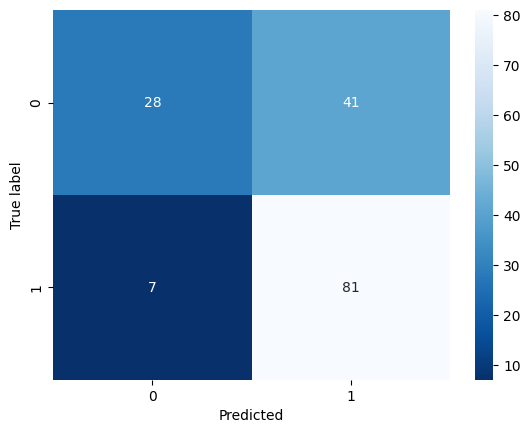

In [113]:
# создадим функцию для расчета логистической регрессии
# в качестве аргументов принимаем:
# "cat_col_names" - список с названиями сталбцов категориальных признаков.
# "num_col_names" - список с названиями сталбцов количественных признаков. 

# список категориальных признаков
cat_col_names = ['breed', 
                 'pasture_type', 
                 'breed_father', 
                 'age', 
                 'suga_protein_ratio_cat', 
                 'name_father',
                 'fat_cat',
                ]

# список количественных признаков
num_col_names = ['energy_feed_unit',
                 'energy_feed_unit_sqr',
                 'raw_protein',
                 'suga_protein_ratio',
                 'fat',
                ]

# удалим из данных столбцы, которые не будем использовать для обучения первой модели
X = ferma_main.drop(['taste_milk', 'taste_milk_int'], axis=1) # входные признаки
y = ferma_main['taste_milk_int']                              # целевой признак

# разделим данные на тренировочные и тестовые, зафиксируем random_state
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    random_state=RANDOM_STATE)

## Масштабирование признаков ---------------------------------------------------

# создаём переменную с экземпляром класса StandartScaler()
scaler = StandardScaler()

# обучим и трансформируем количественные признаки из тренировочной выборки 
X_train_scaled = scaler.fit_transform(X_train[num_col_names])

# выполните преобразование количественных признаков в тестовой выборке
X_test_scaled = scaler.transform(X_test[num_col_names])

## Кодирование признаков ------------------------------------------------------

# создадим переменную с экземпляром класса OneHotEncoder()
# включим параметр для избегания появления дамми-ошибок, отключим sparse-отображение
encoder = OneHotEncoder(drop='first', sparse=False)

# обучим и трансформируем категориальные признаки из тренировочной выборки 
X_train_ohe = encoder.fit_transform(X_train[cat_col_names]) 

# преобразуем категориальные признаки в тестовой выборке
X_test_ohe = encoder.transform(X_test[cat_col_names])

# получим от кодировщика список новых столбцов и сохраним в новой переменной 
encoder_col_names = encoder.get_feature_names_out()

## объедияем преобразованные данные---------------------------------------------

# создаём тренировочный и тестовый датафреймы из закодированных и отмасштабированных данных
# для данных OHE названия столбцов укажем из переменной encoder_col_names

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

# объединяем все преобразованные данные в тренировочный и тестовый датафреймы
# сбрасываем индексы в датафрейме с числовыми индексами, чтобы избежать ошибок

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

## обучение модели логистической регрессии---------------------------------------

# инициализируем модель логистической регрессии
clf = LogisticRegression()

# обучим модель на тренировочных данных
clf = clf.fit(X_train, y_train) 

# получим предсказания модели на тестовых данных 
# сохраним результат в переменную y_pred
y_pred = clf.predict(X_test)

## метрики-----------------------------------------------------------------------

# построим матрицу ошибок
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted'); 

# вычислим и выведем метрики: accuracy, precision, recall
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
accuracy = accuracy_score(y_pred, y_test)

print('recall: ', round(recall,3))
print('precision: ', round(precision,3))
print('accuracy: ', round(accuracy,3)) 

Для фермера важно, чтобы купленная корова давала вкусное молоко. Следовательно критичная ошибка, когда прогноз предсказывает вкусное молоко, а оно оказывается невкусным, т.е. ошибка "False Positive" или `ошибка первого рода`.

Ошибку первого рода показывает метрика `precision`. Чтобы снизить вероятность таких ошибок в реальных прогнозах, нужно чтобы precision была близка к 1: для этого изменим порог принадлежности к классам.

   y_pred_old  y_valid   y_proba  y_pred
0           1        1  0.637851       0
1           1        1  0.716195       0
2           0        1  0.377930       0
3           0        0  0.442904       0
4           1        1  0.791586       0
5           0        0  0.494498       0
6           1        1  0.752555       0
7           1        1  0.636160       0
8           1        1  0.816125       1
9           0        0  0.216374       0
recall:  0.159
precision:  1.0
accuracy:  0.529


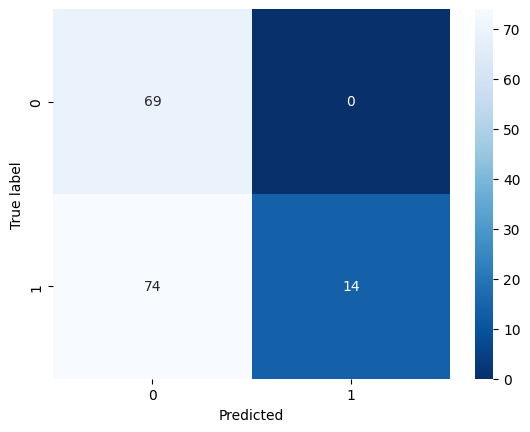

In [114]:
y_proba = clf.predict_proba(X_test)[:,1]

data = pd.DataFrame(zip(y_pred, y_test, y_proba),
             columns = ['y_pred_old', 'y_valid', 'y_proba'])
data['y_pred'] = data['y_proba'].apply(lambda x: 1 if x >= 0.8 else 0)
print(data.head(10)) 

y_test = data['y_valid']
y_pred = data['y_pred']

# построим матрицу ошибок
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted'); 

# вычислим и выведем метрики: accuracy, precision, recall
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
accuracy = accuracy_score(y_pred, y_test)

print('recall: ', round(recall,3))
print('precision: ', round(precision,3))
print('accuracy: ', round(accuracy,3)) 

Измерив порог с 0.5 до 0.8 метрика `precision` выросла до 1 - максимального значения. Как видно из вывода предыдущей ячейки, при таких настройках модель более избирательно предсказывает вкусное молоко. Раньше модель предсказывала "1" ("Вкусно") - см.`'y_pred_old'` и иногда ошибалась (`'y_valid'` - истинные значения). Теперь же модель чаще присваивает категорию "0"("Не вкусно") - см.`'y_pred'`.

Дальнейшее снижение порога не имеет смысла, поскольку общая точность модели (accuracy) будет снижаться, а целевая метрика (precision) уже находится на максимуме и выше быть не может.

Чтобы точность прогноза была выше, необходимо получить от "ЭкоФермы" дополнительную информацию:
- Параметры корма ЭКЕ (Энергетическая кормовая единица). 
- Сырой протеин, г
- СПО (Сахаро-протеиновое соотношение).

### Прогноз вкуса молока

С помощью обученной модели логистической регрессии получим прогноз вкуса молока коров "Экофермы". Пороговое значение принадлежности к классам примем 0,8 - это значение, при котором вероятность ошибки первого рода минимальна.

In [115]:
# выведем cow_buy, которая ранее уже была дополнена новыми признаками
cow_buy

breed pasture_type breed_father name_father   fat  protein  \
0     Вис Бик Айдиал    Холмистое       Айдиал    Геркулес  3.58    3.076   
1     Вис Бик Айдиал    Равнинное      Соверин      Буйный  3.54    3.081   
2   Рефлешн Соверинг    Равнинное      Соверин       Барин  3.59    3.074   
3   Рефлешн Соверинг    Холмистое       Айдиал      Буйный  3.40    3.061   
4   Рефлешн Соверинг    Равнинное       Айдиал      Буйный  3.64    3.074   
5   Рефлешн Соверинг    Равнинное      Соверин    Геркулес  3.63    3.053   
6     Вис Бик Айдиал    Равнинное      Соверин      Буйный  3.57    3.079   
7   Рефлешн Соверинг    Холмистое       Айдиал      Буйный  3.40    3.079   
8     Вис Бик Айдиал    Холмистое      Соверин    Соловчик  3.73    3.055   
9   Рефлешн Соверинг    Равнинное      Соверин    Геркулес  3.73    3.073   
10    Вис Бик Айдиал    Холмистое       Айдиал    Геркулес  3.68    3.046   
11    Вис Бик Айдиал    Холмистое      Соверин       Барин  3.42    3.075   
12  Рефлешн Соверинг    Холмистое       Айдиал      Буйный  3.40    3.065   
13    Вис Бик Айдиал    Холмистое      Соверин    Соловчик  3.73    3.079   
14  Рефлешн Соверинг    Равнинное      Соверин    Геркулес  3.77    3.053   
15    Вис Бик Айдиал    Равнинное      Соверин      Буйный  3.34    3.069   

            age  energy_feed_unit  raw_protein  suga_protein_ratio  \
0   Более 2 лет         15.276162  2019.947532            0.958744   
1   Менее 2 лет         15.276162  2019.947532            0.958744   
2   Более 2 лет         15.276162  2019.947532            0.958744   
3   Более 2 лет         15.276162  2019.947532            0.958744   
4   Более 2 лет         15.276162  2019.947532            0.958744   
5   Менее 2 лет         15.276162  2019.947532            0.958744   
6   Более 2 лет         15.276162  2019.947532            0.958744   
7   Менее 2 лет         15.276162  2019.947532            0.958744   
8   Более 2 лет         15.276162  2019.947532            0.958744   
9   Более 2 лет         15.276162  2019.947532            0.958744   
10  Более 2 лет         15.276162  2019.947532            0.958744   
11  Менее 2 лет         15.276162  2019.947532            0.958744   
12  Более 2 лет         15.276162  2019.947532            0.958744   
13  Более 2 лет         15.276162  2019.947532            0.958744   
14  Менее 2 лет         15.276162  2019.947532            0.958744   
15  Более 2 лет         15.276162  2019.947532            0.958744   

    suga_protein_ratio_cat  energy_feed_unit_sqr  fat_cat  milk_yield_forecast  
0                        1            233.361138        1                 6426  
1                        1            233.361138        0                 6140  
2                        1            233.361138        1                 6050  
3                        1            233.361138        0                 6383  
4                        1            233.361138        1                 6342  
5                        1            233.361138        1                 6178  
6                        1            233.361138        1                 6372  
7                        1            233.361138        0                 6184  
8                        1            233.361138        2                 6385  
9                        1            233.361138        2                 6624  
10                       1            233.361138        1                 6426  
11                       1            233.361138        0                 5895  
12                       1            233.361138        0                 6383  
13                       1            233.361138        2                 6385  
14                       1            233.361138        2                 6425  
15                       1            233.361138        0                 6339

Подготовим данные для прогноза.


In [117]:
## Кодирование признаков ------------------------------------------------------
# преобразуем категориальные признаки в прогнозной выборке
X_predict_ohe = encoder.transform(cow_buy[cat_col_names])

## Масштабирование признаков --------------------------------------------------
# выполним преобразование количественных признаков в прогнозной выборке
X_predict_scaled = scaler.transform(cow_buy[num_col_names])

# получим от кодировщика список новых столбцов и сохраним в новой переменной 
encoder_col_names = encoder.get_feature_names_out()

## объедияем преобразованные данные---------------------------------------------

# создаём прогнозный датафрейм из закодированных и отмасштабированных данных
# для данных OHE названия столбцов укажем из переменной encoder_col_names
X_predict_ohe = pd.DataFrame(X_predict_ohe, columns=encoder_col_names)
X_predict_scaled = pd.DataFrame(X_predict_scaled, columns=num_col_names)

# объединяем все преобразованные данные прогнозный датафрейм
# сбрасываем индексы в датафрейме с числовыми индексами, чтобы избежать ошибок

X_predict = pd.concat([X_predict_ohe, X_predict_scaled], axis=1)

# выведем на экран подготовленные данные
X_predict

breed_Рефлешн Соверинг  pasture_type_Холмистое  breed_father_Соверин  \
0                      0.0                     1.0                   0.0   
1                      0.0                     0.0                   1.0   
2                      1.0                     0.0                   1.0   
3                      1.0                     1.0                   0.0   
4                      1.0                     0.0                   0.0   
5                      1.0                     0.0                   1.0   
6                      0.0                     0.0                   1.0   
7                      1.0                     1.0                   0.0   
8                      0.0                     1.0                   1.0   
9                      1.0                     0.0                   1.0   
10                     0.0                     1.0                   0.0   
11                     0.0                     1.0                   1.0   
12                     1.0                     1.0                   0.0   
13                     0.0                     1.0                   1.0   
14                     1.0                     0.0                   1.0   
15                     0.0                     0.0                   1.0   

    age_Менее 2 лет  suga_protein_ratio_cat_1  name_father_Буйный  \
0               0.0                       1.0                 0.0   
1               1.0                       1.0                 1.0   
2               0.0                       1.0                 0.0   
3               0.0                       1.0                 1.0   
4               0.0                       1.0                 1.0   
5               1.0                       1.0                 0.0   
6               0.0                       1.0                 1.0   
7               1.0                       1.0                 1.0   
8               0.0                       1.0                 0.0   
9               0.0                       1.0                 0.0   
10              0.0                       1.0                 0.0   
11              1.0                       1.0                 0.0   
12              0.0                       1.0                 1.0   
13              0.0                       1.0                 0.0   
14              1.0                       1.0                 0.0   
15              0.0                       1.0                 1.0   

    name_father_Геркулес  name_father_Соловчик  fat_cat_1  fat_cat_2  \
0                    1.0                   0.0        1.0        0.0   
1                    0.0                   0.0        0.0        0.0   
2                    0.0                   0.0        1.0        0.0   
3                    0.0                   0.0        0.0        0.0   
4                    0.0                   0.0        1.0        0.0   
5                    1.0                   0.0        1.0        0.0   
6                    0.0                   0.0        1.0        0.0   
7                    0.0                   0.0        0.0        0.0   
8                    0.0                   1.0        0.0        1.0   
9                    1.0                   0.0        0.0        1.0   
10                   1.0                   0.0        1.0        0.0   
11                   0.0                   0.0        0.0        0.0   
12                   0.0                   0.0        0.0        0.0   
13                   0.0                   1.0        0.0        1.0   
14                   1.0                   0.0        0.0        1.0   
15                   0.0                   0.0        0.0        0.0   

    energy_feed_unit  energy_feed_unit_sqr  raw_protein  suga_protein_ratio  \
0            0.56625              0.542248     0.517384             1.41473   
1            0.56625              0.542248     0.517384             1.41473   
2            0.56625              0.542248     0.517384             1.41473

In [118]:
# получим прогноз и сохраним в датафрейм cow_buy в столбец 'taste_milk_forecast'
y_proba = clf.predict_proba(X_predict)[:,1]

df = pd.DataFrame(zip(y_proba), columns = ['y_proba'])
cow_buy['taste_milk_forecast'] = df['y_proba'].apply(lambda x: "Вкусно" if x >= 0.8 else "Не вкусно")

# выведем датафрейм с прогнозом
cow_buy

breed pasture_type breed_father name_father   fat  protein  \
0     Вис Бик Айдиал    Холмистое       Айдиал    Геркулес  3.58    3.076   
1     Вис Бик Айдиал    Равнинное      Соверин      Буйный  3.54    3.081   
2   Рефлешн Соверинг    Равнинное      Соверин       Барин  3.59    3.074   
3   Рефлешн Соверинг    Холмистое       Айдиал      Буйный  3.40    3.061   
4   Рефлешн Соверинг    Равнинное       Айдиал      Буйный  3.64    3.074   
5   Рефлешн Соверинг    Равнинное      Соверин    Геркулес  3.63    3.053   
6     Вис Бик Айдиал    Равнинное      Соверин      Буйный  3.57    3.079   
7   Рефлешн Соверинг    Холмистое       Айдиал      Буйный  3.40    3.079   
8     Вис Бик Айдиал    Холмистое      Соверин    Соловчик  3.73    3.055   
9   Рефлешн Соверинг    Равнинное      Соверин    Геркулес  3.73    3.073   
10    Вис Бик Айдиал    Холмистое       Айдиал    Геркулес  3.68    3.046   
11    Вис Бик Айдиал    Холмистое      Соверин       Барин  3.42    3.075   
12  Рефлешн Соверинг    Холмистое       Айдиал      Буйный  3.40    3.065   
13    Вис Бик Айдиал    Холмистое      Соверин    Соловчик  3.73    3.079   
14  Рефлешн Соверинг    Равнинное      Соверин    Геркулес  3.77    3.053   
15    Вис Бик Айдиал    Равнинное      Соверин      Буйный  3.34    3.069   

            age  energy_feed_unit  raw_protein  suga_protein_ratio  \
0   Более 2 лет         15.276162  2019.947532            0.958744   
1   Менее 2 лет         15.276162  2019.947532            0.958744   
2   Более 2 лет         15.276162  2019.947532            0.958744   
3   Более 2 лет         15.276162  2019.947532            0.958744   
4   Более 2 лет         15.276162  2019.947532            0.958744   
5   Менее 2 лет         15.276162  2019.947532            0.958744   
6   Более 2 лет         15.276162  2019.947532            0.958744   
7   Менее 2 лет         15.276162  2019.947532            0.958744   
8   Более 2 лет         15.276162  2019.947532            0.958744   
9   Более 2 лет         15.276162  2019.947532            0.958744   
10  Более 2 лет         15.276162  2019.947532            0.958744   
11  Менее 2 лет         15.276162  2019.947532            0.958744   
12  Более 2 лет         15.276162  2019.947532            0.958744   
13  Более 2 лет         15.276162  2019.947532            0.958744   
14  Менее 2 лет         15.276162  2019.947532            0.958744   
15  Более 2 лет         15.276162  2019.947532            0.958744   

    suga_protein_ratio_cat  energy_feed_unit_sqr  fat_cat  \
0                        1            233.361138        1   
1                        1            233.361138        0   
2                        1            233.361138        1   
3                        1            233.361138        0   
4                        1            233.361138        1   
5                        1            233.361138        1   
6                        1            233.361138        1   
7                        1            233.361138        0   
8                        1            233.361138        2   
9                        1            233.361138        2   
10                       1            233.361138        1   
11                       1            233.361138        0   
12                       1            233.361138        0   
13                       1            233.361138        2   
14                       1            233.361138        2   
15                       1            233.361138        0   

    milk_yield_forecast taste_milk_forecast  
0                  6426              Вкусно  
1                  6140           Не вкусно  
2                  6050           Не вкусно  
3                  6383              Вкусно  
4                  6342           Не вкусно  
5                  6178           Не вкусно  
6                  6372           Не вкусно  
7                  6184              Вкусно  
8                  6385              Вкусно  
9               

**Вывод:**

- Подготовили данные и обучили модель логистической регрессии.
- Проанализировали результаты и настроили модель на точный прогноз вкусного молока.
- Подготовили данные для прогноза и по обученной модели сделали прогноз вкуса молока.

В итоге у 7 коров "ЭкоФермы" по прогнозу вкусное молоко, у остальных - невкусное.

## Итоговые выводы

**В ходе проекта мы провели следующую работу:**
- изучили данные, проверили их на предмет аномалий и несоответствий;
- произвели предобработку для последующего анализа: изменили названия столбцов, проверили их на пропуски, обработали явные и неявные дубликаты;
- объединили данные из разных таблиц;
- произвели исследовательский анализ основных показателей: 
- - удой;
- - ЭКЕ;
- - сырой протеин в корме;
- - СПО;
- - порода коровы;
- - тип пастбища;
- - порода бака - отца коровы;
- - жирность молока;
- - содержание белков в молоке;
- - вкус молока;
- - возраст коров;
- - имя быка - отца коровы.
- произвели корреляционный анализ и установили взаимосвязь между признаками;
- обучили три модели линейной регрессии, произвели анализ их работы и выбрали лучшую;
- по модели линейной регрессии сделали прогноз удоя молока коров "ЭкоФермы";
- обучили модель логистической регрессии и настроили её прогноз на минимальную ошибку первого рода (чтобы модель максимально точно определяла коров со вкусным молоком);
- по модели логистической регрессии сделали прогноз вкуса молока от коров "ЭкоФермы".

**В результате получили следующие прогнозы:**
1. Все, кроме одной, рассмотренные коровы "ЭкоФермы" дадут более 6000 кг молока в год.
2. Семь коров "ЭкоФермы" дадут вкусное молоко.

***По удою и по вкусу молока одновременно для покупки подходят 6 коров.***

Результаты анализа могут измениться, если собрать дополнительную информацию. Для улучшения качества анализа, необходимо следующее:
1. Получить от "ЭкоФермы": 
- `id` каждой коровы (или иную уникальную информацию), чтобы на этапе предобработки понимать, где явные дубликаты, а где совпадающие характеристики разных коров.
- Параметры корма: ЭКЕ, Сырой протеин, СПО.
- Характеристики молока: Удой, Вкус.
2. Уточнить: Барин, Буйный, Геркулес, Соловчик для фермерских коров и для коров "ЭкоФермы" - это одни и те же быки-осеменители или по совпанению они "тёзки"?
3. Получить методику определения вкуса молока фермерских коров для оценки её объективности.

**О моделях линейной регрессии и логистической регрессии.**

Для улучшения качества регрессионной модели мы сделали следующие шаги:
- устранили нелинейность, преобразовав СПО в категориальный бинарный признак.
- добавили ещё один входной признак - имя отца коровы.
- для модели логистической регрессии провели настройку для минимизации ошибки первого рода.

Результаты работы моделей можно улучшить, добавив новые признаки, но в первую очередь для более точных прогнозов важно собрать недостающие данные.

Для решения задачи классификации, в том числе при помощи модели логистической регрессии при анализе рисков особенно важны метрики `recall` и `precision`. Эти метрики позволяют уменьшить вероятность ошибок первого или второго рода.